# Loan Prediction Based on Customer Behavior

  - This project is the final project assignment from the Rakamin Data Science bootcamp that I am taking, where we are required to go through the end-to-end process of a data science project analyzing factors influencing the default (failure to pay) of a lending company.

  - After the project is completed and presented to the panelists, who are highly experienced experts in the field of data science and business, I personally carry out further improvements based on their suggestions and feedback for this project.

  - I also translate the original version in Indonesian language to English so that non-Indonesian could understand.

# **STAGE 0 : BUSINESS UNDERSTANDING**

## Problem Statement

A lending company needs to verify loan applications from its prospective borrowers (customers). The manual verification procedure conducted by the company has resulted in numerous inaccurate assessments, leading to loans being granted to borrowers who ultimately fail to repay (default). This has proven detrimental to the company as it incurs financial losses without any return. Additionally, the manual verification process also consumes a considerable amount of time.

Building on this issue, the company aims to develop an automated system that can predict the creditworthiness of prospective borrowers in the future based on past borrower data to reduce the selection of potential customers with high default risks.

## Role

As a Data Scientist Team, our role involves conducting analysis to gain business insights and designing models that have an impact on business development.

## Goals

* Enhanced credit risk evaluation: Improve the assessment of credit risk by implementing machine learning models. (**MAIN**)
* Increased efficiency: Streamline the credit risk assessment process for greater effectiveness and reduced processing time. (**SECONDARY**)

## Objectives

The ultimate goal of this project is to create a machine learning model that can:

* Predict credit risk with a high recall rate. The objective is to reduce the risk of losses due to inaccurate risk assessments.
* Provide automated credit risk assessment decisions in a short amount of time.

## Business Metrics

* Default Rate (%) : The percentage of prospective customers who fail to repay a loan (default) divided by the total number of customers. (**MAIN**)
* Approval Time (**SECONDARY**)

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

### Import Libraries and Settings

In [4]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Numeric calculations
import pandas as pd # Data manipulation
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline

import sklearn
import joblib
import pickle

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1
scikit-learn version: 1.2.2
joblib version: 1.3.2


In [2]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np # Numeric calculations
import pandas as pd # Data manipulation
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline

import sklearn
import joblib
import pickle

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2
scikit-learn version: 1.4.0
joblib version: 1.3.2


#### Load Dataset (Jupyter Notebook)

In [3]:
df = pd.read_csv('Training Data.csv')

#### Load Dataset (Google Colab)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/Dackers - Rakamin Final Project/Training Data.csv')

Mounted at /content/drive


# Descriptive Statistics

In [ ]:
# Retrieve 10 sample lines from the available data
df.sample(10)

Id   Income  Age  Experience Married/Single House_Ownership  \
83527    83528  6772070   28          19         single          rented   
140772  140773  2901323   56           2        married          rented   
233335  233336  7441601   26           1        married          rented   
250919  250920  7199372   32          13         single          rented   
171008  171009  3935358   54          15         single    norent_noown   
158270  158271  2607103   33           8         single          rented   
202680  202681   543441   39          14         single          rented   
109318  109319  5233653   71           9         single          rented   
140834  140835  5603227   62           9         single          rented   
199740  199741  5195681   53           1        married          rented   

       Car_Ownership            Profession          CITY           STATE  \
83527             no            Consultant      Durgapur     West_Bengal   
140772           yes  Chartered_Accountant       Cuttack          Odisha   
233335            no      Graphic_Designer    Srikakulam  Andhra_Pradesh   
250919            no              Surveyor  Motihari[34]           Bihar   
171008           yes             Scientist        Kanpur   Uttar_Pradesh   
158270            no          Army_officer     New_Delhi           Delhi   
202680           yes              Official     Raebareli   Uttar_Pradesh   
109318           yes  Chartered_Accountant      Shivpuri  Madhya_Pradesh   
140834            no            Politician    Ulhasnagar     Maharashtra   
199740           yes            Politician     Begusarai           Bihar   

        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
83527                10                 13          0  
140772                2                 10          0  
233335                1                 12          0  
250919               13                 12          1  
171008                5                 10          0  
158270                4                 13          0  
202680               11                 11          0  
109318                3                 11          0  
140834                4                 12          0  
199740                1                 14          0

In [ ]:
# Viewing information available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


**Feature Information**

- Id                 : Unique id of the user
- Income             : Income of the user
- Age                : Age of the user
- Experience         : Professional experience of the user in years
- Married/Single     : Marital status (married or single)
- House_Ownership    : Homeownership status (owned, rented, or norent_noown)
- Car_Ownership      : Carownership status (yes or no)
- Profession         : Profession
- CITY               : City of residence
- STATE              : State of residence
- CURRENT_JOB_YRS    : Years of experience in the current job
- CURRENT_HOUSE_YRS  : Number of years in the current residence
- Risk_Flag          : Defaulted on a loan (0 : not default, 1 : default/failed to pay)

In [ ]:
# Checking duplicate values
df.duplicated().sum()

0

In [ ]:
#Additional check by seeing the unique ID more than 1
check_duplicate_byID = df.groupby('Id')['Id'].transform('count') > 1
df[check_duplicate_byID]

Empty DataFrame
Columns: [Id, Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, Risk_Flag]
Index: []

There are no missing values atau duplicate values in this dataset.

## Initial Feature Transformation

In [4]:
# Rename some columns
df.rename(columns={'CURRENT_JOB_YRS' : 'Current_Job_Years',
                   'CURRENT_HOUSE_YRS' : 'Current_House_Years',
                   'CITY' : 'City',
                   'STATE' : 'State',
                   'Married/Single' : 'Marital_Status'}, inplace=True)

# Drop Id column
df.drop(columns='Id', inplace=True)

In [5]:
# Grouping columns based on data types
nums = ['Income', 'Age', 'Experience', 'Current_Job_Years', 'Current_House_Years', 'Risk_Flag'] # Numerical
cats = ['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession', 'City', 'State'] # Categorical

In [ ]:
# Checking unique values for each categorical columns
for col in cats:
    print()
    print(f"{col}: {df[col].unique()}")


Marital_Status: ['single' 'married']

House_Ownership: ['rented' 'norent_noown' 'owned']

Car_Ownership: ['no' 'yes']

Profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']

City: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[

The values in profession, state and city have some problem where they contains character of square brackets ([ ]), underscore (_), and comma (,). We will need to identify and then clean these values.

In [6]:
columns_to_clean = ['Profession', 'State', 'City']

In [9]:
# Identify [] characters in columns_to_clean
for col in columns_to_clean :

  #Count for unique cities for that contains [] character
  unique_count = df[df[col].str.contains('[', regex=False)][col].nunique()
  print(f'number of unique {col} with [] : {unique_count}')

  #Display cities and value counts for that contains [] character
  print(df[df[col].str.contains('[', regex=False)][col].value_counts(), '\n')

number of unique Profession with [] : 0
Series([], Name: Profession, dtype: int64) 

number of unique State with [] : 1
Uttar_Pradesh[5]    743
Name: State, dtype: int64 

number of unique City with [] : 30
Saharsa[29]            1180
Hajipur[31]            1098
Erode[17]              1064
Anantapuram[24]         994
Buxar[37]               985
Visakhapatnam[4]        971
Eluru[25]               933
Siwan[32]               865
Kishanganj[35]          838
Tirupati[21][22]        833
Dehri[30]               823
Tiruchirappalli[10]     809
Kadapa[23]              807
Guntur[13]              800
Mysore[7][8][9]         739
Ramagundam[27]          734
Jehanabad[38]           719
Aurangabad[39]          708
Kurnool[18]             702
Sasaram[30]             702
Chittoor[28]            695
Nellore[14][15]         674
Jamalpur[36]            673
Kota[6]                 660
Jammu[16]               644
Motihari[34]            641
Rajahmundry[19][20]     598
Purnia[26]              494
Warangal[

In [10]:
# Identify _ characters in columns_to_clean
for col in columns_to_clean :

  #Count for unique cities for that contains _ character
  unique_count = df[df[col].str.contains('_', regex=False)][col].nunique()
  print(f'number of unique {col} with _ : {unique_count}')

  #Display cities and value counts for that contains _ character
  print(df[df[col].str.contains('_', regex=False)][col].value_counts(), '\n')

number of unique Profession with _ : 23
Web_designer                  5397
Computer_hardware_engineer    5372
Fashion_Designer              5304
Air_traffic_controller        5281
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Technology_specialist         4737
Design_Engineer               4729
Army_officer                  4661
Civil_engineer                4616
Chartered_Accountant          4493
Civil_servant                 4413
Name: Profession, dtype: int64 

number of unique State with _ : 8
Uttar_Pradesh        28400
Andhra_Pradesh       25297
West_Bengal          23483
Tamil_N

In [7]:
# Removing those characters from the 'Profession', 'City', and 'State' column
for col in columns_to_clean:
  df[col] = df[col].str.replace(r'\[\d+\]', '', regex=True)
  df[col] = df[col].str.replace('_', ' ')
  df[col] = df[col].str.replace(',', ' ')

In [8]:
# Rename the format of the values inthose columns to title
for col in columns_to_clean:
  df[col] = df[col].str.lower()

In [9]:
# Describe numerical columns
df.describe().transpose()

count          mean           std      min        25%  \
Income               252000.0  4.997117e+06  2.878311e+06  10310.0  2503015.0   
Age                  252000.0  4.995407e+01  1.706385e+01     21.0       35.0   
Experience           252000.0  1.008444e+01  6.002590e+00      0.0        5.0   
Current_Job_Years    252000.0  6.333877e+00  3.647053e+00      0.0        3.0   
Current_House_Years  252000.0  1.199779e+01  1.399037e+00     10.0       11.0   
Risk_Flag            252000.0  1.230000e-01  3.284379e-01      0.0        0.0   

                           50%        75%        max  
Income               5000694.5  7477502.0  9999938.0  
Age                       50.0       65.0       79.0  
Experience                10.0       15.0       20.0  
Current_Job_Years          6.0        9.0       14.0  
Current_House_Years       12.0       13.0       14.0  
Risk_Flag                  0.0        0.0        1.0

In [ ]:
# Describe categorical columns
df.describe(exclude=['int64','float64']).transpose()

count unique            top    freq
Marital_Status   252000      2         single  226272
House_Ownership  252000      3         rented  231898
Car_Ownership    252000      2             no  176000
Profession       252000     51      physician    5957
City             252000    316     aurangabad    1543
State            252000     28  uttar pradesh   29143

# Descriptive Statistics Findings

* A. All data types are correct, and there are no missing or duplicated values in this dataset.

* B. The column names are generally correct; only a few categorical columns have been renamed for clarity and to standardize the writing format with other columns. Additionally, initial cleaning has been performed on some categorical values.

* C. The summary values for numerical and categorical columns appear normal. However, it is noteworthy that the target variable (Risk_Flag) exhibits a significant class imbalance, which will be addressed further in subsequent steps.

# Univariate Analysis

In [ ]:
# Re-check numerical and categorical columns for plotting
print(df[nums].columns)
print(df[cats].columns)

Index(['Income', 'Age', 'Experience', 'Current_Job_Years',
       'Current_House_Years', 'Risk_Flag'],
      dtype='object')
Index(['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession',
       'City', 'State'],
      dtype='object')


## Numerical Columns

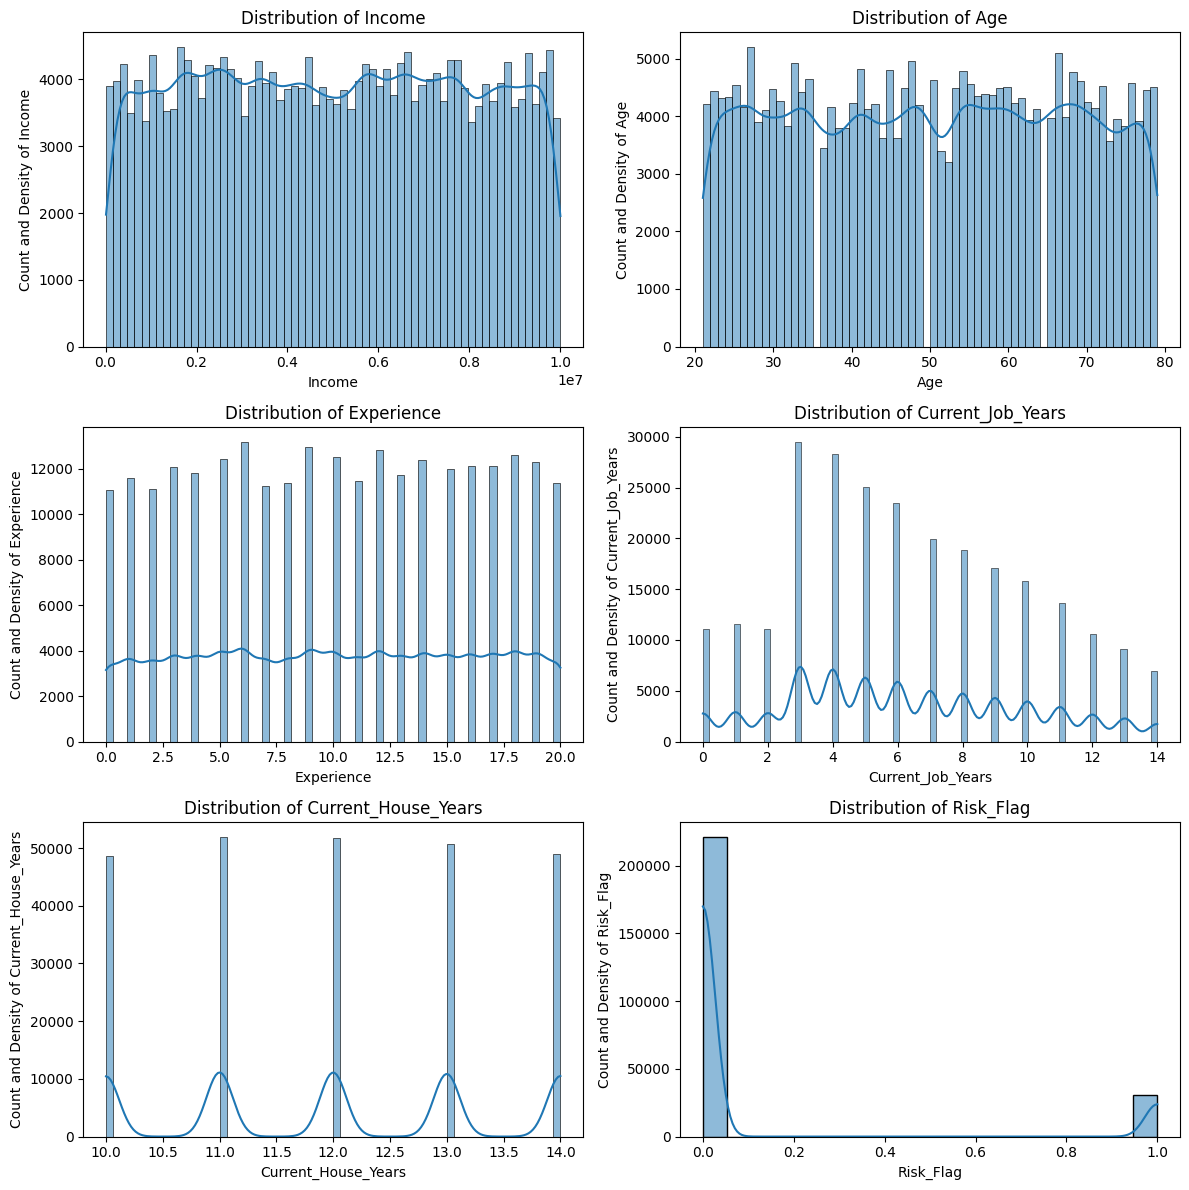

In [ ]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
ax = ax.flatten()

for i in range(len(nums)) :
  sns.histplot(data = df, ax=ax[i], x=nums[i], kde=True)
  ax[i].set_title(f'Distribution of {nums[i]}')
  ax[i].set_ylabel(f'Count and Density of {nums[i]}')
  ax[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(ax) :
    ax[len(df.columns)].remove()

plt.tight_layout()

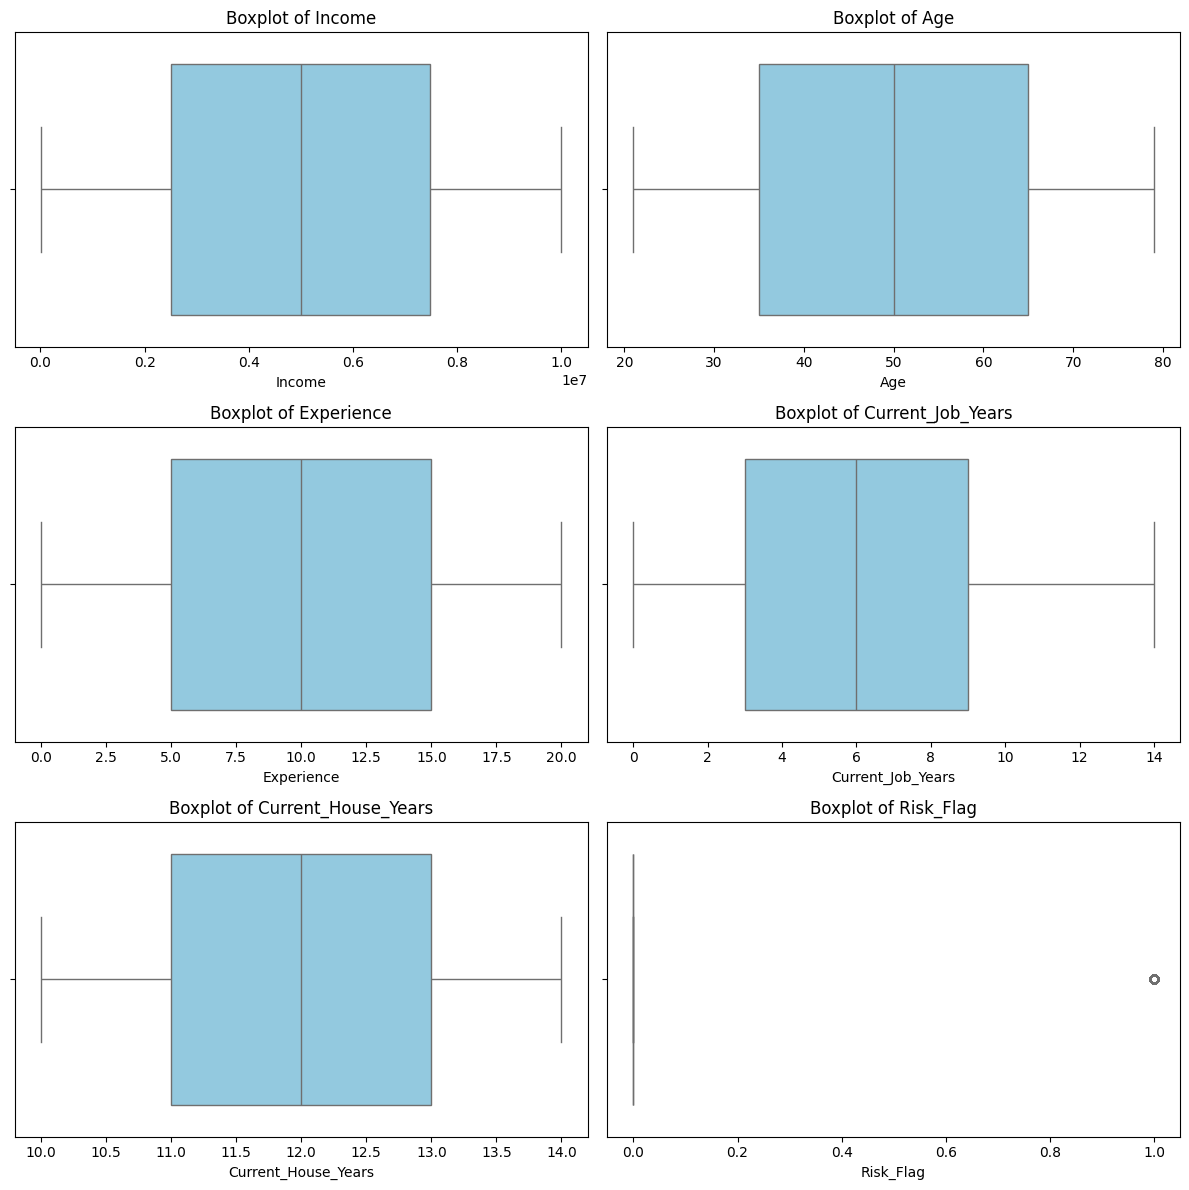

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()

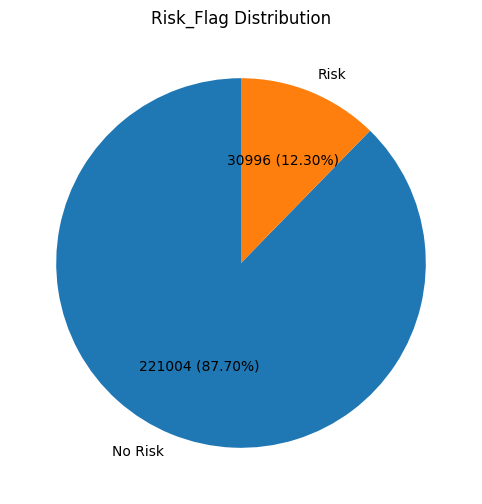

In [ ]:
# Risk_Flag Distribution (Combined Pie Chart)
fig, ax = plt.subplots(figsize=(12, 6))
labels = ['No Risk', 'Risk']
sizes = df['Risk_Flag'].value_counts()

ax.pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.2f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
ax.set_title('Risk_Flag Distribution')
plt.show()

## Categorical Columns

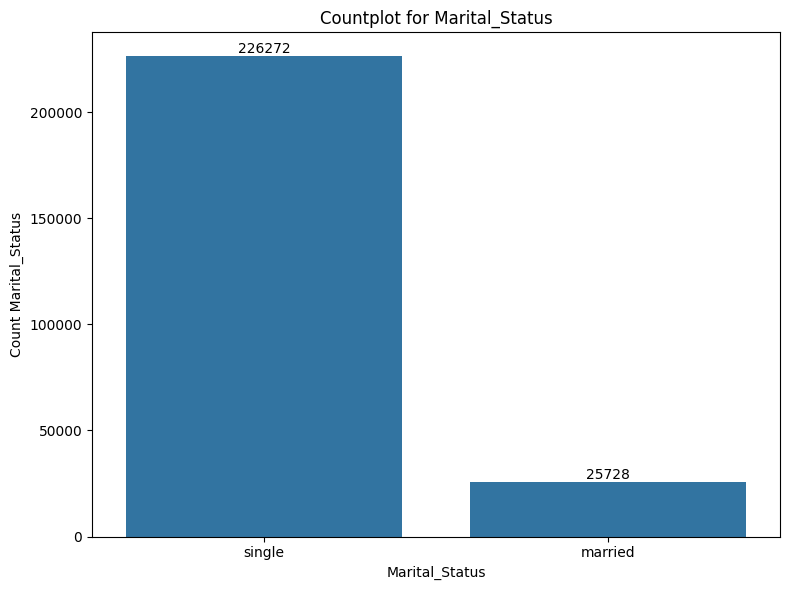

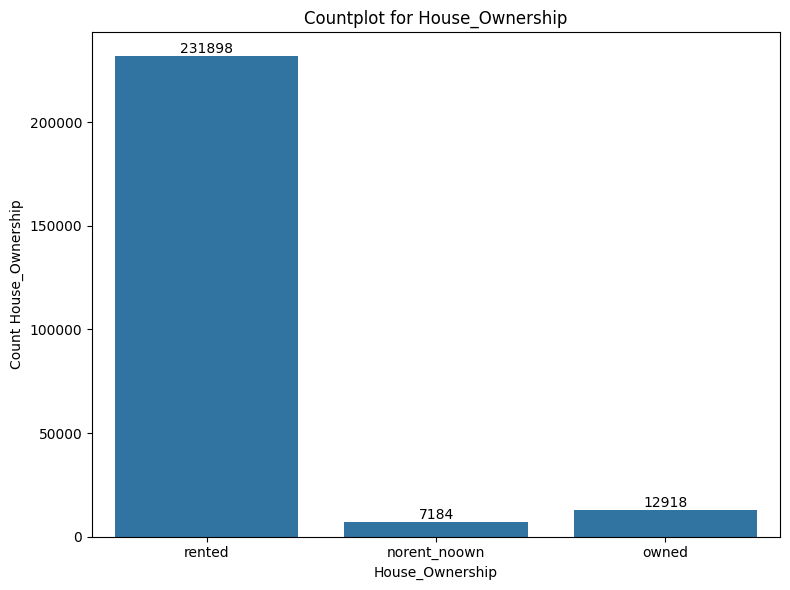

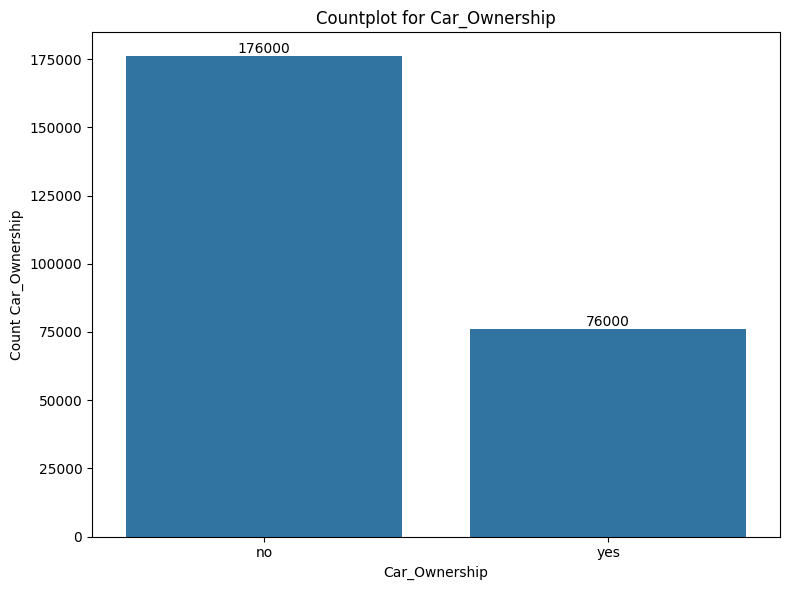

In [10]:
# Categorical Countplot (Few unique values)
cats_few = ['Marital_Status', 'House_Ownership', 'Car_Ownership']

for cat in cats_few:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=df, x=cat, ax=ax)
    ax.set_title(f'Countplot for {cat}')
    ax.set_ylabel(f'Count {cat}')
    ax.tick_params(axis='x')
    ax.bar_label(ax.containers[0])

    plt.tight_layout()
    plt.show()

Profession, State, and City are too many to be plotted altogether since they have many unique values, so we will only look at the top 10.

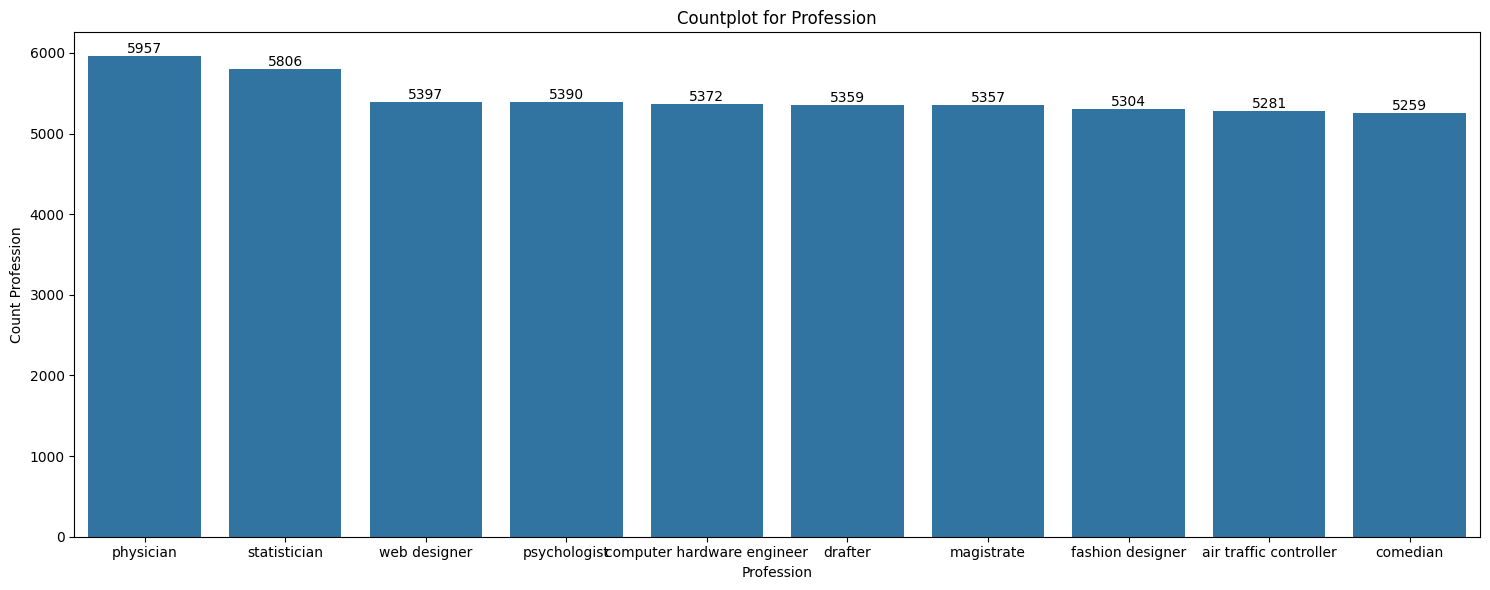

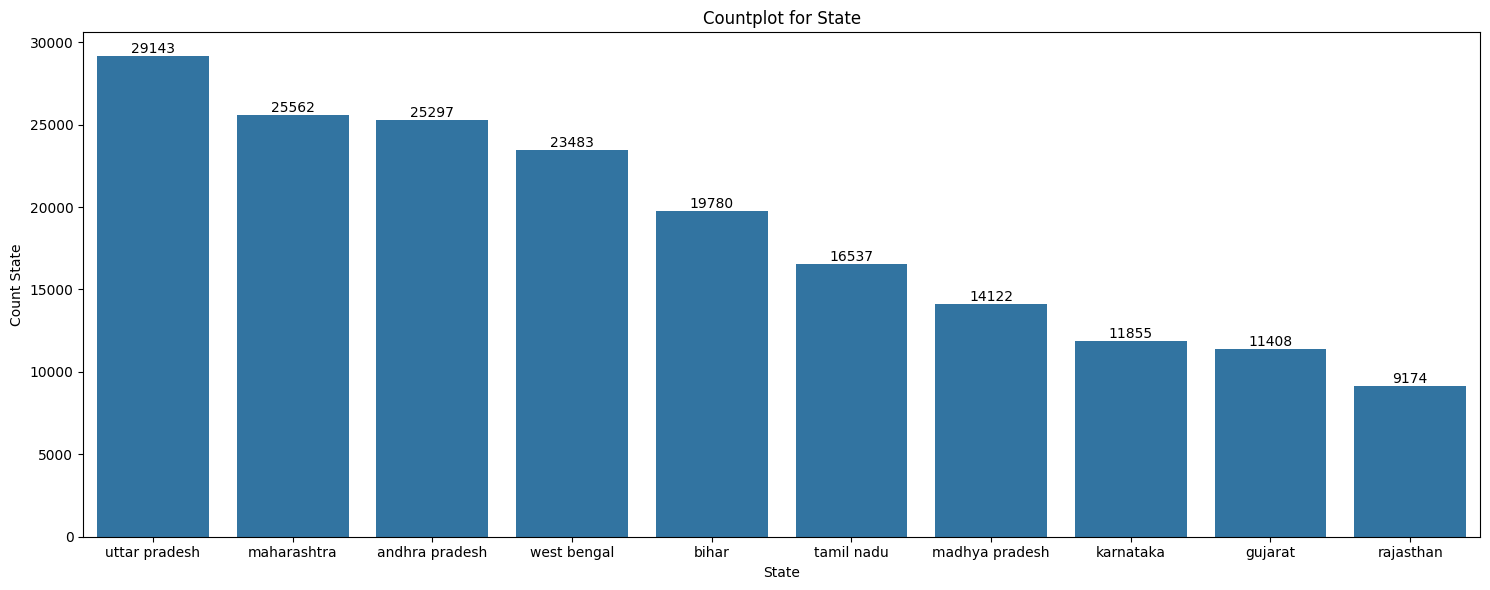

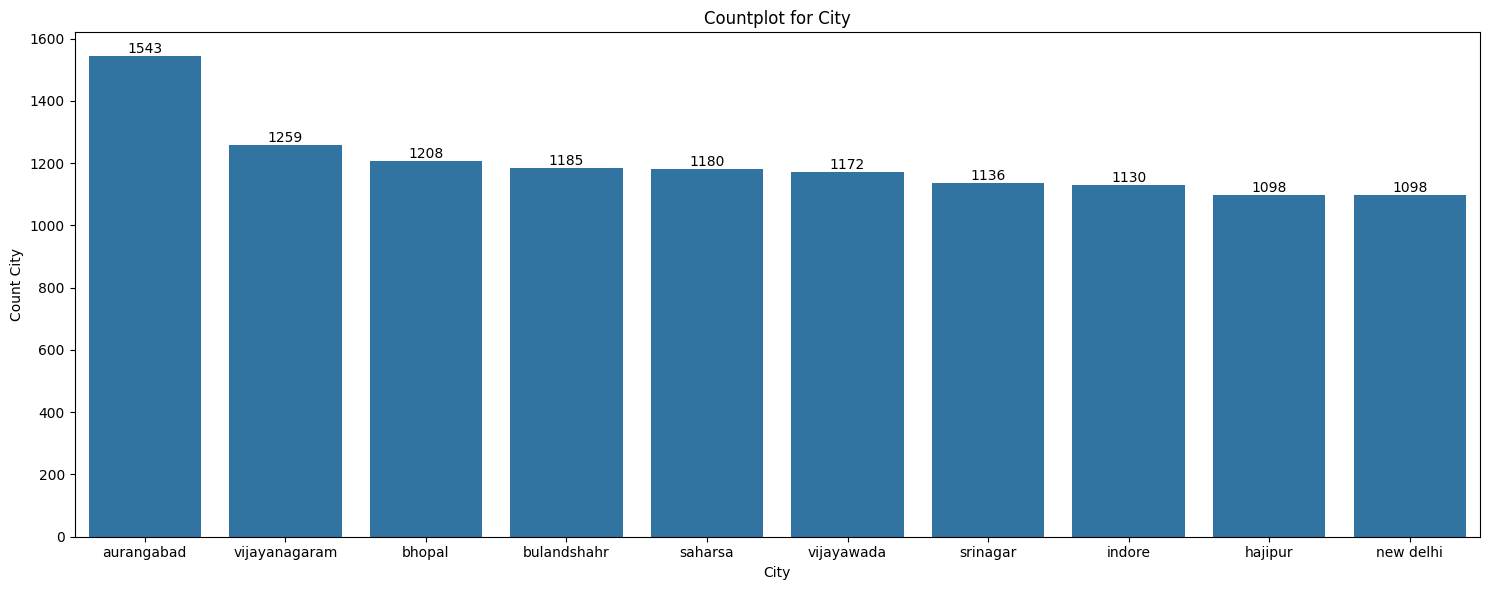

In [11]:
# Categorical Countplot (Top 10)
cats_many = ['Profession', 'State', 'City']

for cat in cats_many :
    fig, ax = plt.subplots(figsize=(15,6))
    sns.countplot(data = df, x=cat, ax=ax, order=df[cat].value_counts().iloc[:10].index)
    ax.set_title(f'Countplot for {cat}')
    ax.set_ylabel(f'Count {cat}')
    ax.tick_params(axis='x')
    ax.bar_label(ax.containers[0])

    plt.tight_layout()
    plt.show()

# Univariate Analysis Findings

- For the analysis of numerical columns, several findings were observed:

    1. The distribution of the target variable (Risk_Flag) is bimodal, with a significant dominance of the value 0 (No default or non-failure to pay).

    2. Features like Income, Age, and Experience exhibit a uniform distribution, while Current_House_Years and Current_Job_Years have multi-modal distributions as indicated by histplot with kde. No outliers were detected for the overall numerical features based on boxplots.

    3. Some features, such as Income and Age, may require scaling due to their large value ranges.

- For the analysis of categorical columns, several observations were made:

    1. Categories in the Profession, City, and State features have too many unique values, making it challenging to plot the entire distribution.

    2. Some features have dominating values, including:
        - Car_Ownership: no
        - House_Ownership: rented
        - Married/Single: single

- Some follow-up steps during data pre-processing include:

    1. Handling categorical data from features like Profession, City, and State with a large number of unique values. This can be achieved by grouping or categorizing them to reduce the number of distinct values before encoding.

    2. Considering resampling due to class imbalance in the target variable, where Risk_Flag 1 (Default) represents only 12.3% of the total data. This imbalance falls into the category of moderate (1-20%), and resampling may be necessary.

# Bivariate/Multivariate Analysis

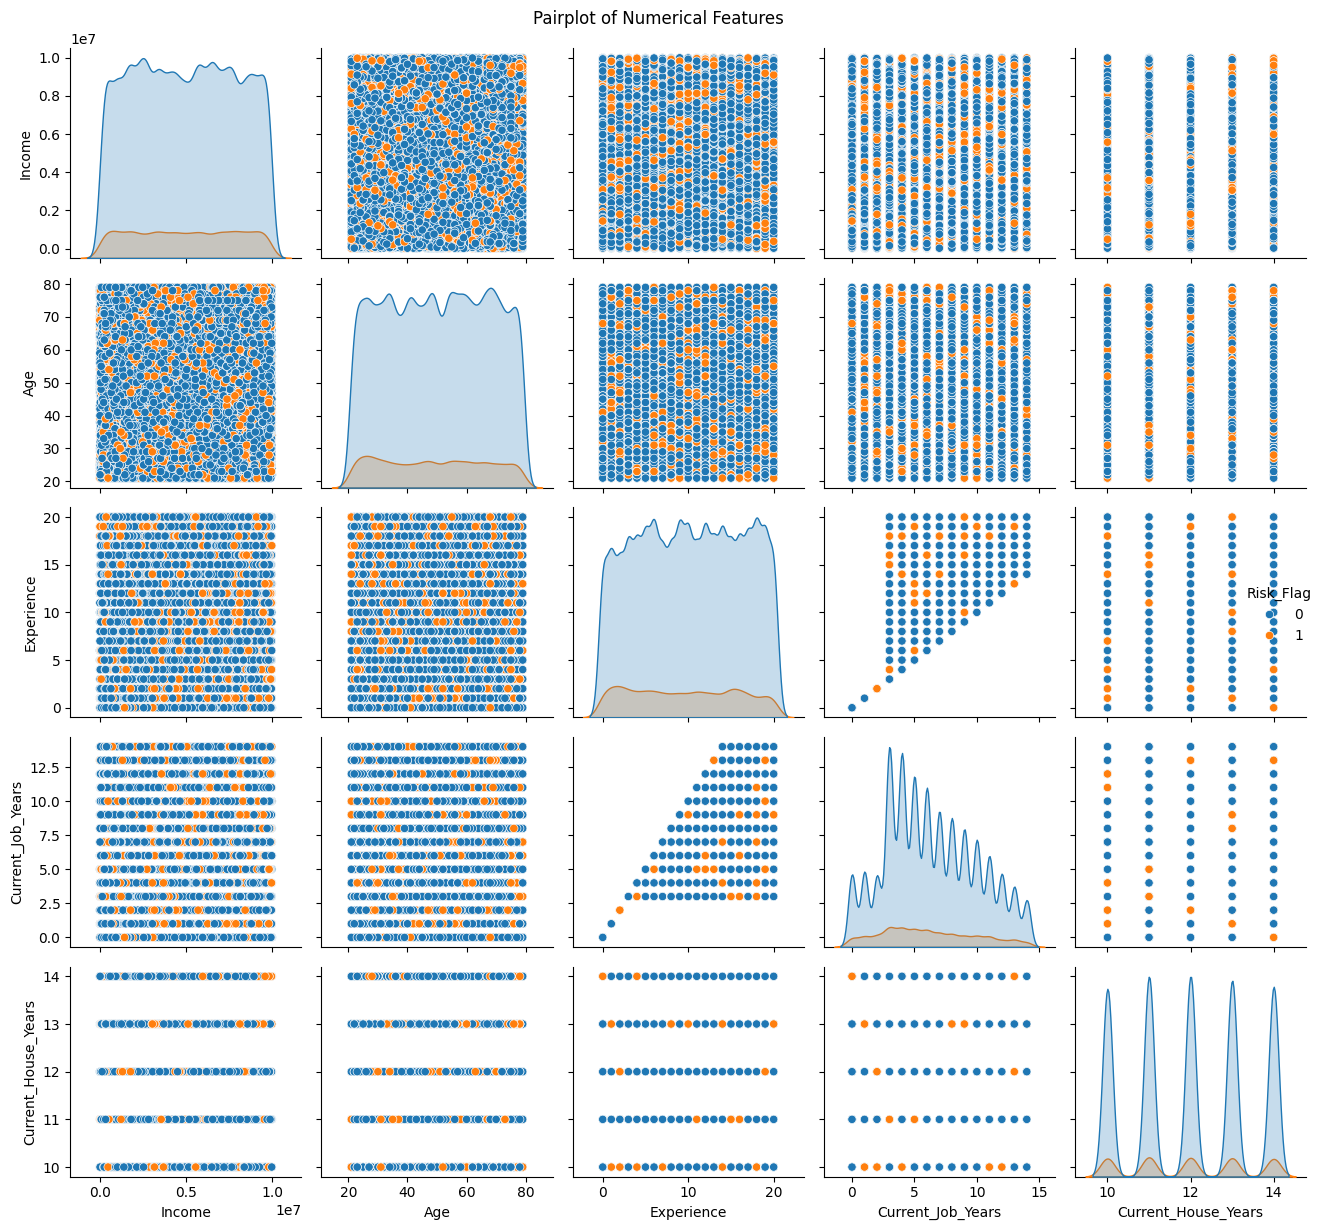

In [ ]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Risk_Flag')
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

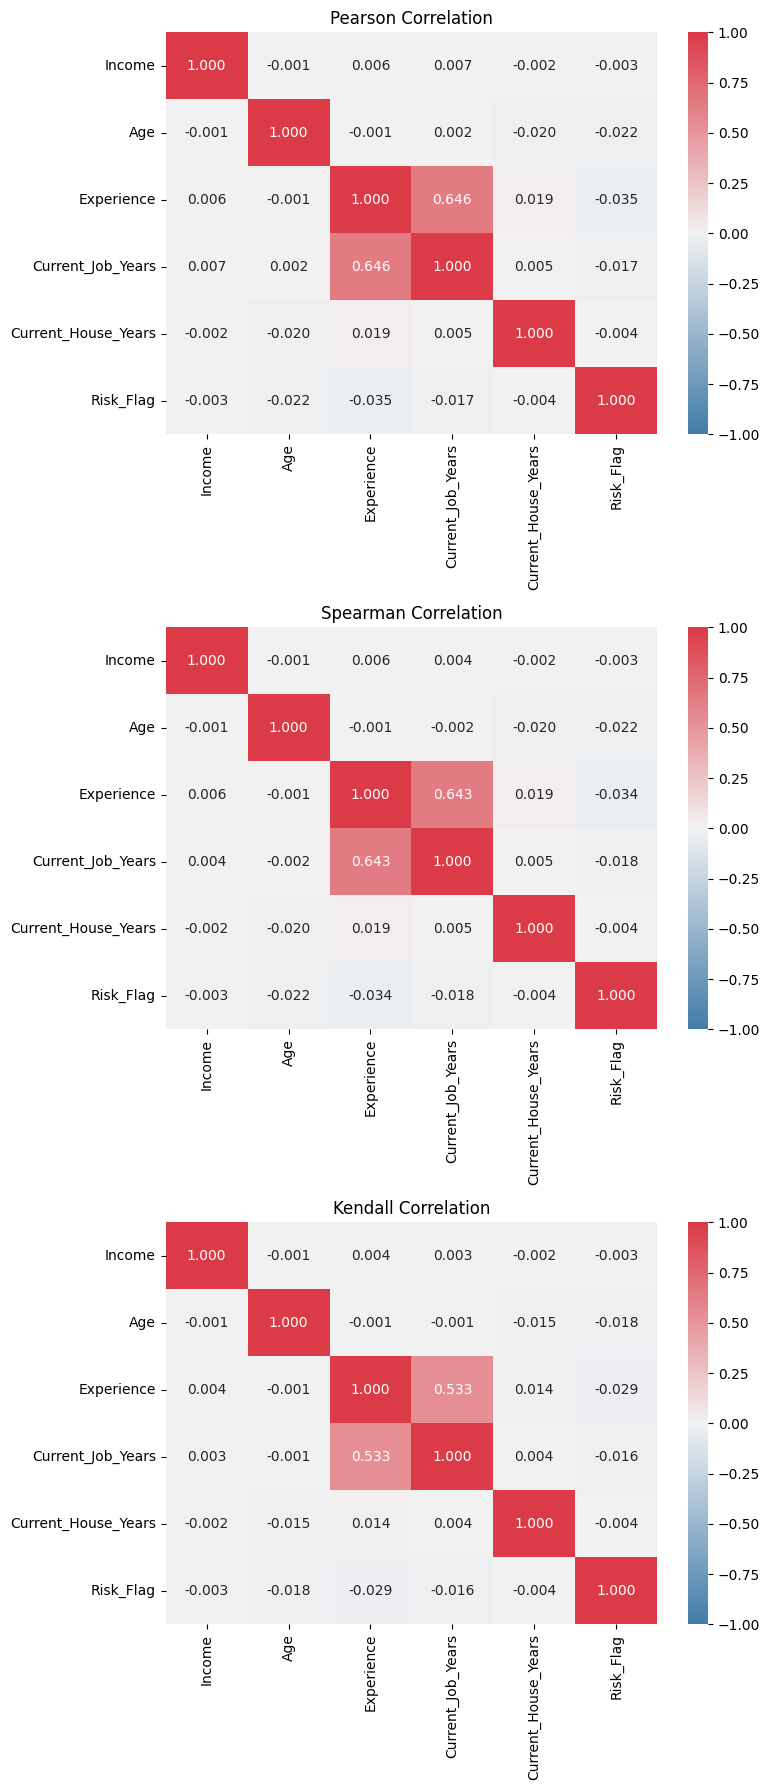

In [ ]:
# Correlation heatmap of numerical features and target
fig, ax = plt.subplots(3, 1, figsize=(8, 18))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
sns.heatmap(data=df.corr(numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Pearson Correlation')

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title('Spearman Correlation')

# Plot correlation heatmap with Kendall method
sns.heatmap(data=df.corr(method='kendall', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

Observing the relationship between non-linear feature-feature and feature-target pairs in the previous pairplot (scatterplot matrix), the use of the Pearson method may not be suitable. Therefore, when examining correlations using `df.corr()`, it is more appropriate to rely on the results of the Spearman method, which can capture non-linear relationships.

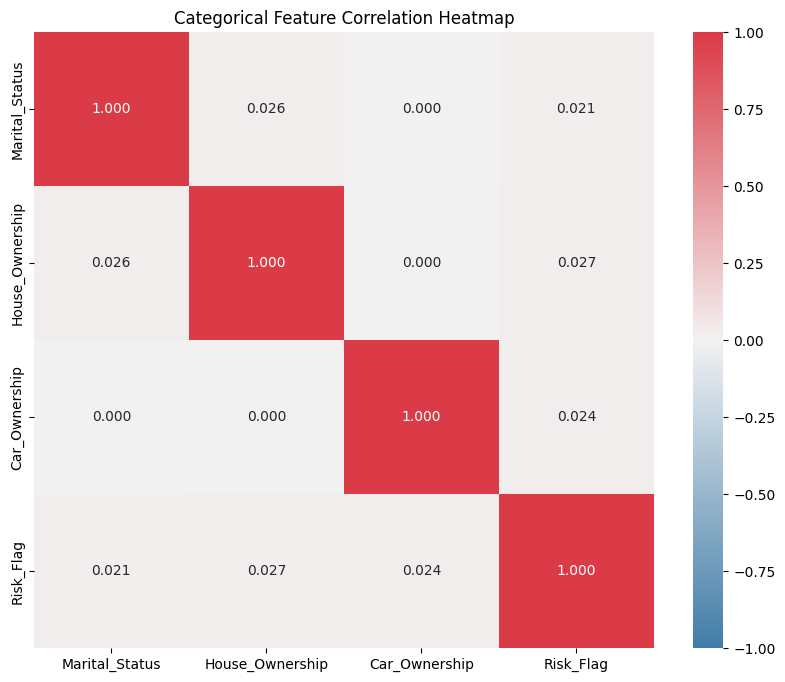

In [ ]:
# Checking correlation of categorical features
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

cats_few_correlation = ['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Risk_Flag']

le = LabelEncoder()
df_encoded_correlation = df[cats_few_correlation].apply(le.fit_transform)

# Function to calculate Cramér's V correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate the correlation of each categorical feature
corr_matrix = pd.DataFrame(index=cats_few_correlation, columns=cats_few_correlation)

for i in range(len(cats_few_correlation)):
    for j in range(i, len(cats_few_correlation)):
        corr = cramers_v(df_encoded_correlation[cats_few_correlation[i]], df_encoded_correlation[cats_few_correlation[j]])
        corr_matrix.at[cats_few_correlation[i], cats_few_correlation[j]] = corr
        corr_matrix.at[cats_few_correlation[j], cats_few_correlation[i]] = corr

corr_matrix = corr_matrix.astype(float)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap_custom, fmt='.3f', vmin=-1, vmax=1)
plt.title('Categorical Feature Correlation Heatmap')
plt.show()

From the heatmap of categorical feature above, it is apparent that there is no data with a significant correlation. This indicates that the features are independent of each other.

**Additional Information About Cramér's V**

Cramér's V is a measure of association between two categorical variables. It is an extension of the chi-square (χ²) test for independence and provides a way to quantify the strength of the association between categorical variables. Cramér's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

The formula for Cramér's V is:

\[ V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}} \]

Where:
- \( \chi^2 \) is the chi-square statistic obtained from the contingency table,
- \( n \) is the total number of observations,
- \( k \) is the number of categories in one variable, and
- \( r \) is the number of categories in the other variable.

Cramér's V is commonly used for square contingency tables, but it can be applied to rectangular tables as well. It is particularly useful when dealing with nominal categorical variables and helps assess the strength of association between them. Keep in mind that Cramér's V is sensitive to table size, so its interpretation should be done with consideration of the specific context and domain knowledge.

Other references for categorical correlation : https://www.statology.org/correlation-between-categorical-variables/

# Multivariate Analysis Findings

- For the time being, from this EDA process (before performing feature encoding), the relationships among all numerical features and the target are considered to have low correlation (<0.04). The most relevant features are Experience (-0.034), Age (-0.022), and Current_Job_Years (-0.018).

- Experience and Current_Job_Years features have a relatively high positive correlation (0.646). This implies that the larger the experience, the longer the current job years, indicating that these two features are quite redundant. Therefore, one of them needs to be dropped; in this case, the feature to be dropped is Current_Job_Years (-0.018) as it has a lower correlation with the target compared to the Experience feature. Meanwhile, the relationships among other features have relatively low correlations, <= 0.02.

- In categorical correlation, the features are independent of each other.

# Business Insight

### Default by Numerical Columns

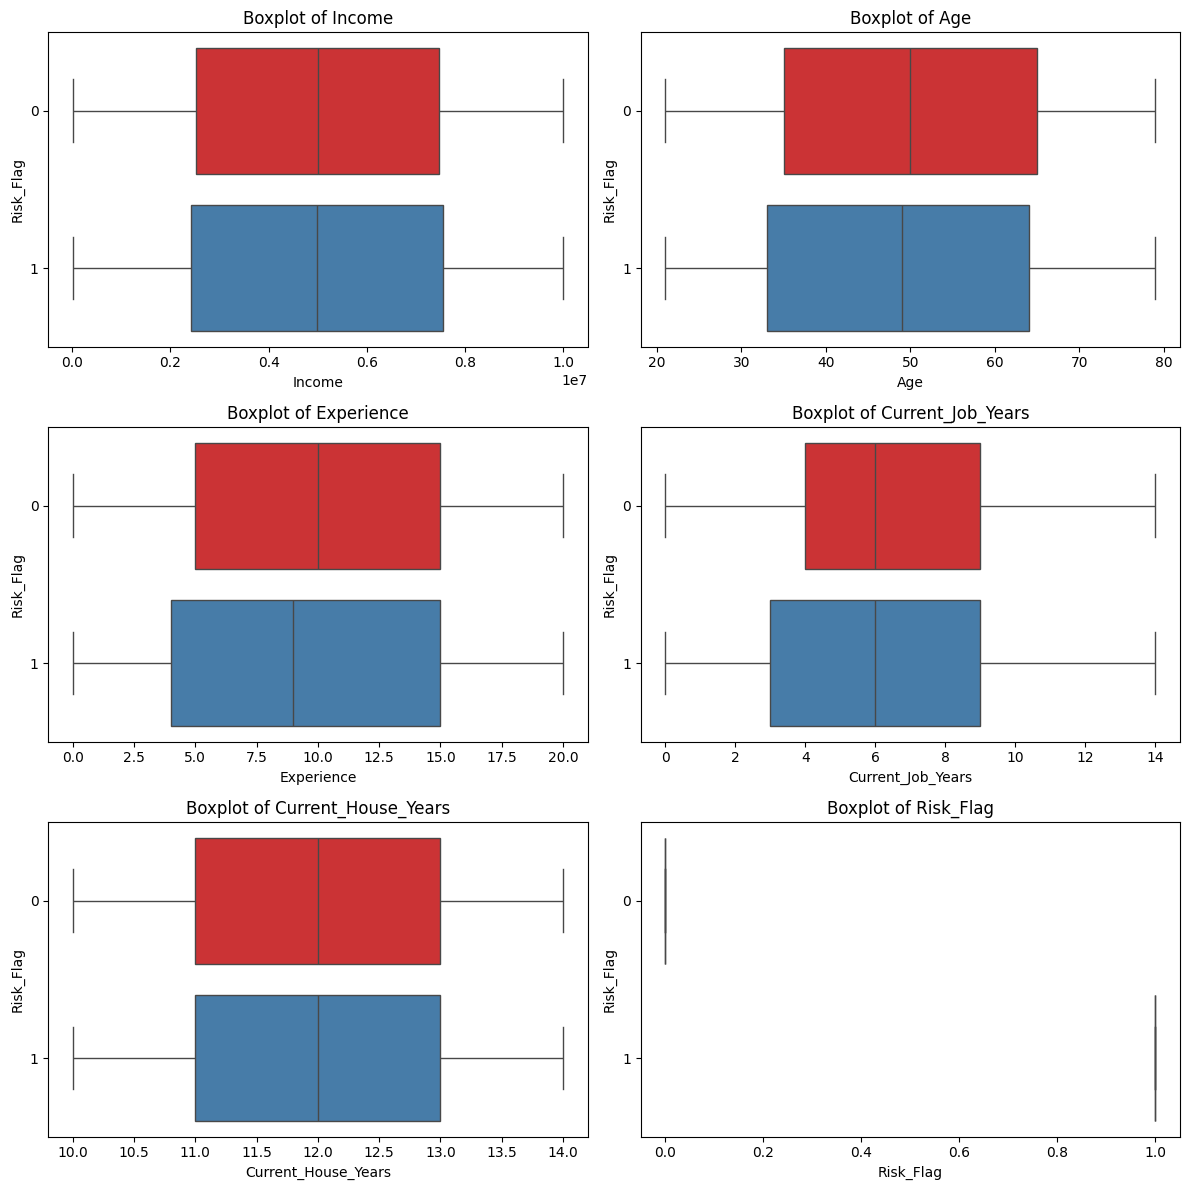

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(data=df, ax=axes[i], x=nums[i], y='Risk_Flag', orient='h', palette='Set1')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(axes) :
    axes[len(df.columns)].remove()

plt.tight_layout()
plt.show()

### Default by Marital_Status, House Ownership, and Car Ownership

#### Plotting by the amount

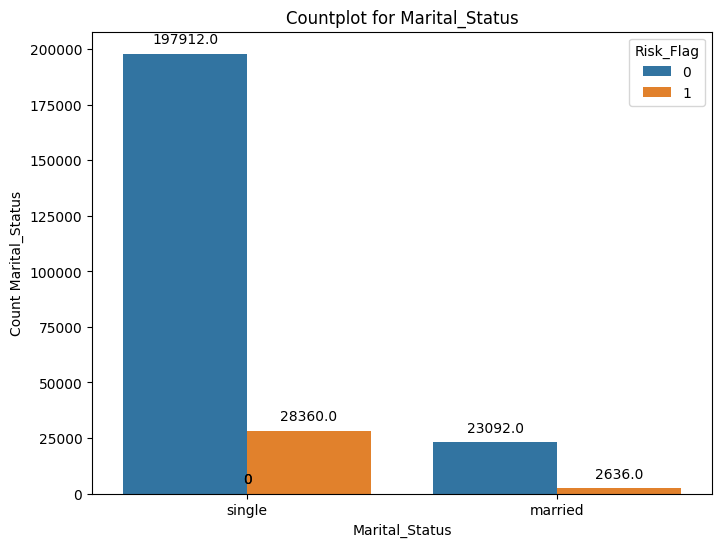

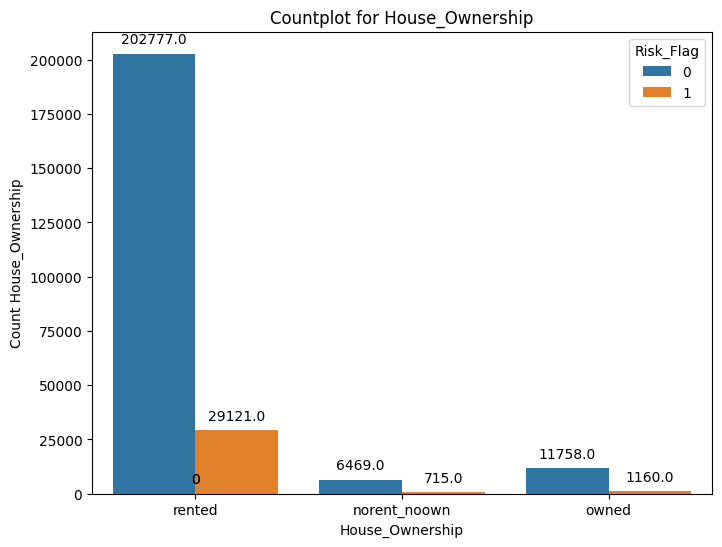

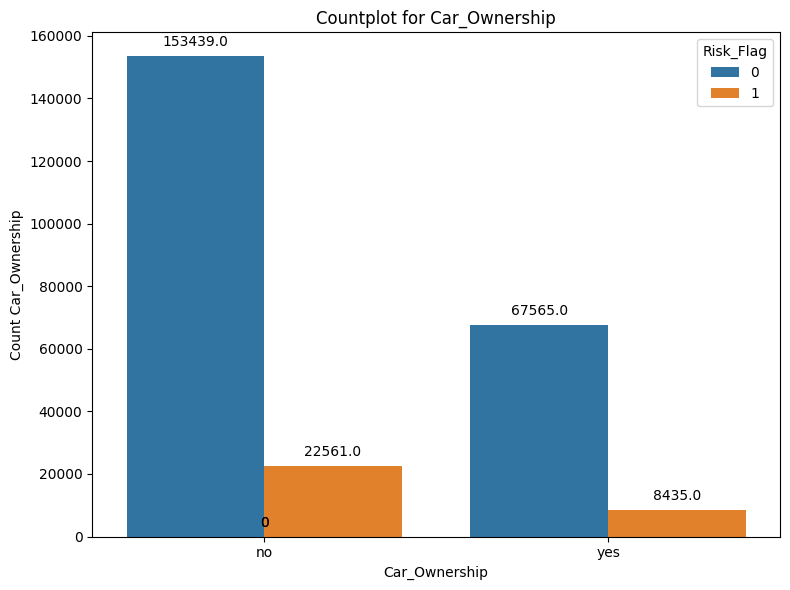

In [ ]:
# Countplot Categorical (Few unique values)
for cat in cats_few :
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.countplot(data=df, ax=ax, x=cat, hue='Risk_Flag')
    ax.set_title(f'Countplot for {cat}')
    ax.set_ylabel(f'Count {cat}')
    ax.tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Plotting by Ratio

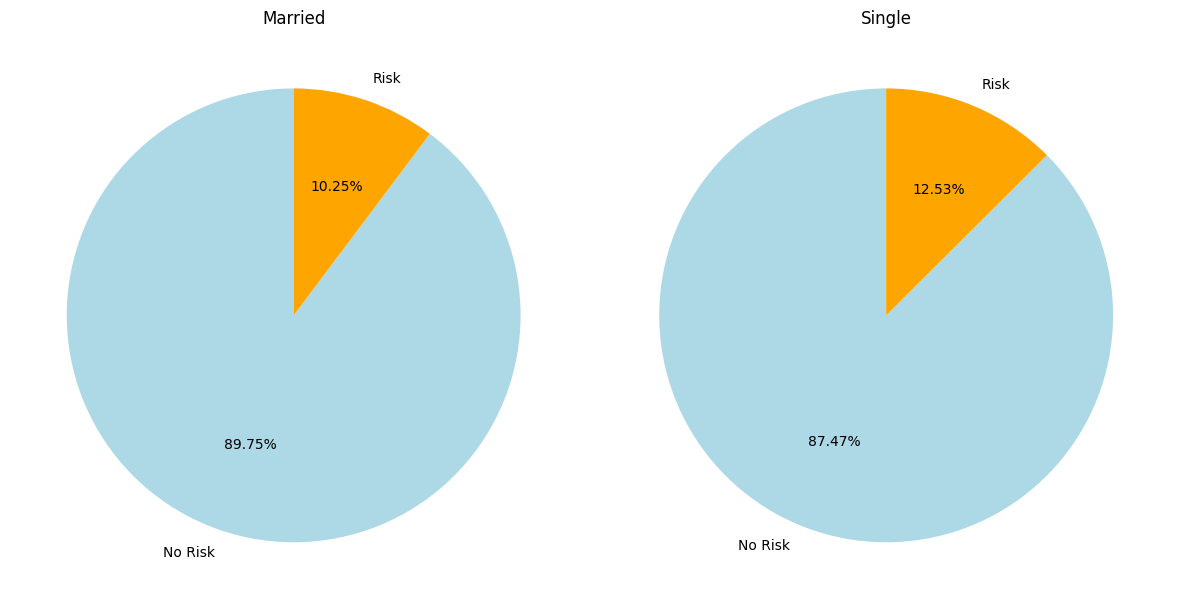

In [ ]:
# Proportion of marital status by risk_flag
proporsi_married_status = df.groupby(['Marital_Status', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(proporsi_married_status.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_married_status.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=90)

ax[0].set_title('Married')
ax[1].set_title('Single')

plt.tight_layout()
plt.show()

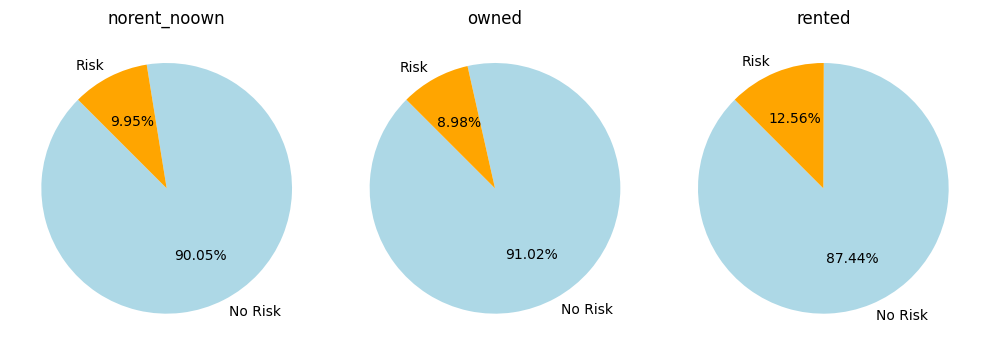

In [ ]:
# Proportion of house ownership by risk_flag
proporsi_house_ownership = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

ax[0].pie(proporsi_house_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[0].set_title('norent_noown')

ax[1].pie(proporsi_house_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[1].set_title('owned')

ax[2].pie(proporsi_house_ownership.iloc[2,:], labels=['No Risk','Risk'], autopct='%1.2f%%', colors=colors, startangle=135)
ax[2].set_title('rented')

plt.tight_layout()
plt.show()

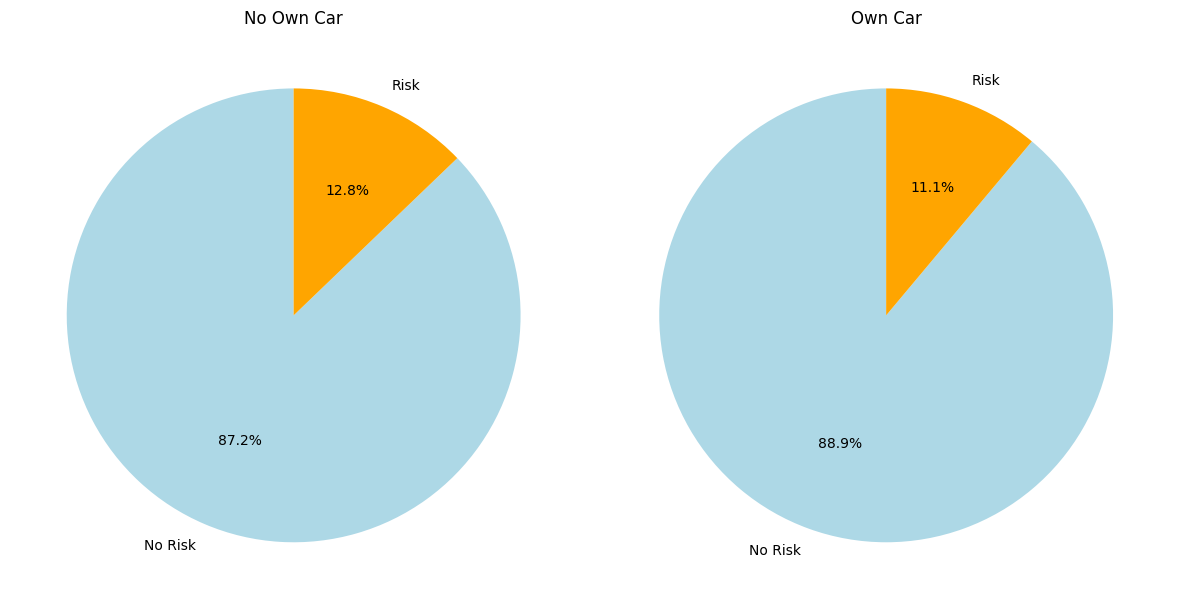

In [ ]:
# Proportion of car ownership by risk_flag
proporsi_car_ownership = df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Plotting pie chart
colors = ['lightblue', 'orange']
labels = proporsi_car_ownership.columns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(proporsi_car_ownership.iloc[0,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)
ax[1].pie(proporsi_car_ownership.iloc[1,:], labels=['No Risk','Risk'], autopct='%1.1f%%', colors=colors, startangle=90)

ax[0].set_title('No Own Car')
ax[1].set_title('Own Car')

plt.tight_layout()
plt.show()

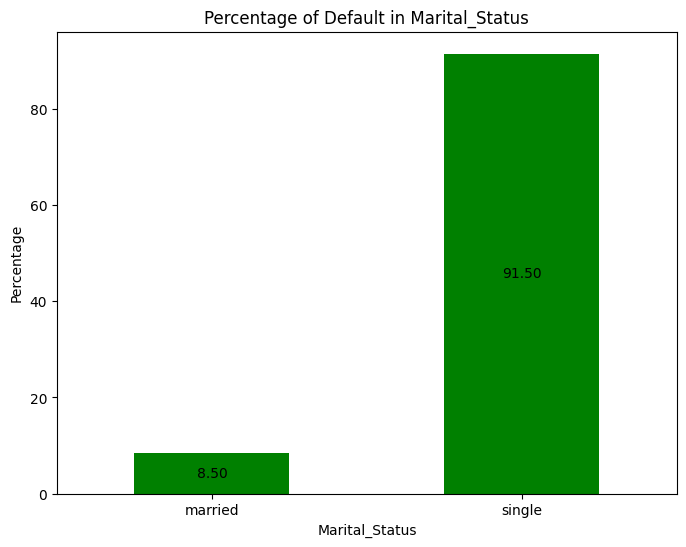

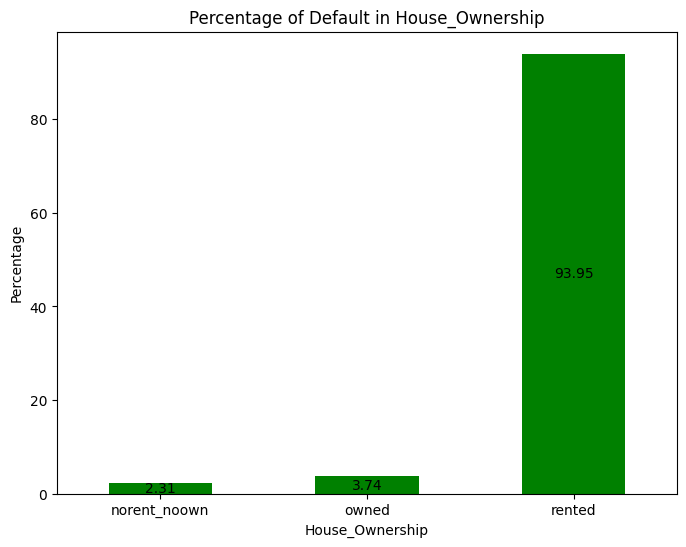

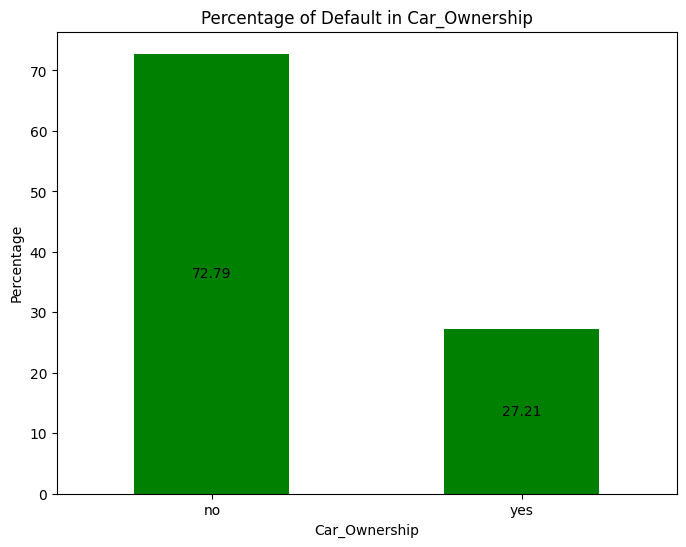

In [ ]:
#Percentage of default for each category
for cat in cats_few :
    fig, ax = plt.subplots(figsize=(8, 6))

    df_cats_group = df[df['Risk_Flag'] == 1].groupby(cat).size() / df[df['Risk_Flag'] == 1].shape[0] * 100

    ax = df_cats_group.plot(kind='bar', color='green')
    ax.bar_label(ax.containers[0], fmt='%.2f', label_type='center') #experimenting with putting the label inside the bar
    ax.set_title(f'Percentage of Default in {cat}')
    ax.set_ylabel(f'Percentage')
    ax.tick_params(axis='x', rotation=0)

#### **Business Insight:**

From the information on categorical features, customers applying for loans are predominantly from the single category, only have rented homes, and do not own a car. When compared for each category:

1. **Based on Marital Status (Married/Single):**
   - Customers who are single are slightly more inclined to have the potential for default compared to married customers. This insight suggests that marital status may play a role in assessing the risk of loan default.

2. **Based on Home Ownership Status (Rented/Own/No House):**
   - Customers who have rented homes (rented) tend to have a higher potential for default compared to customers with private homes or no home ownership. This indicates that the status of home ownership is a significant factor in assessing the risk of loan default.

3. **Based on Car Ownership Status (Yes/No):**
   - Customers who do not own a car are slightly more inclined to have the potential for default compared to those who own a car. This suggests that car ownership status may influence a customer's ability to repay the loan.

It is important to emphasize that these findings may be biased due to the imbalance in the available data across categories. Further analysis and a deeper understanding of these factors are required to make more accurate decisions in credit risk assessment.

#### Business Recommendation

1. **Marital Status:**
   - **Targeted Risk Mitigation for Single Applicants:**
     - Implement a more rigorous risk assessment process for loan applications from single individuals, taking into account additional financial indicators and conducting thorough background checks. This can help in identifying potential default risks early on and adjusting loan terms accordingly.

   - **Customized Loan Products:**
     - Develop loan products tailored to the needs and financial situations of single individuals. This could include personalized interest rates, repayment schedules, or other terms that better align with the financial capabilities of single applicants, potentially reducing the default risk.

2. **Home Ownership Status:**
   - **Adjusted Loan Terms for Renters:**
     - For customers with rented homes, consider offering loan products with terms that accommodate their financial situation, such as flexible repayment schedules or lower interest rates. This can help mitigate the higher default potential associated with rented home ownership.

   - **Financial Education Programs:**
     - Implement financial education programs specifically targeting customers who rent homes. These programs can empower renters with better financial management skills, reducing the likelihood of default and improving their overall financial stability.

3. **Car Ownership Status:**
   - **Risk-Adjusted Interest Rates:**
     - Introduce risk-adjusted interest rates based on car ownership status. Customers without a car may face higher interest rates due to the perceived higher default risk. Offering competitive rates to car owners may incentivize them to choose your loan products.

   - **Collaboration with Dealerships:**
     - Explore partnerships with car dealerships to provide exclusive loan offers or discounts to customers purchasing cars. This collaboration can attract customers with car ownership aspirations and potentially lower the default risk associated with non-car owners.

### Default by Profession

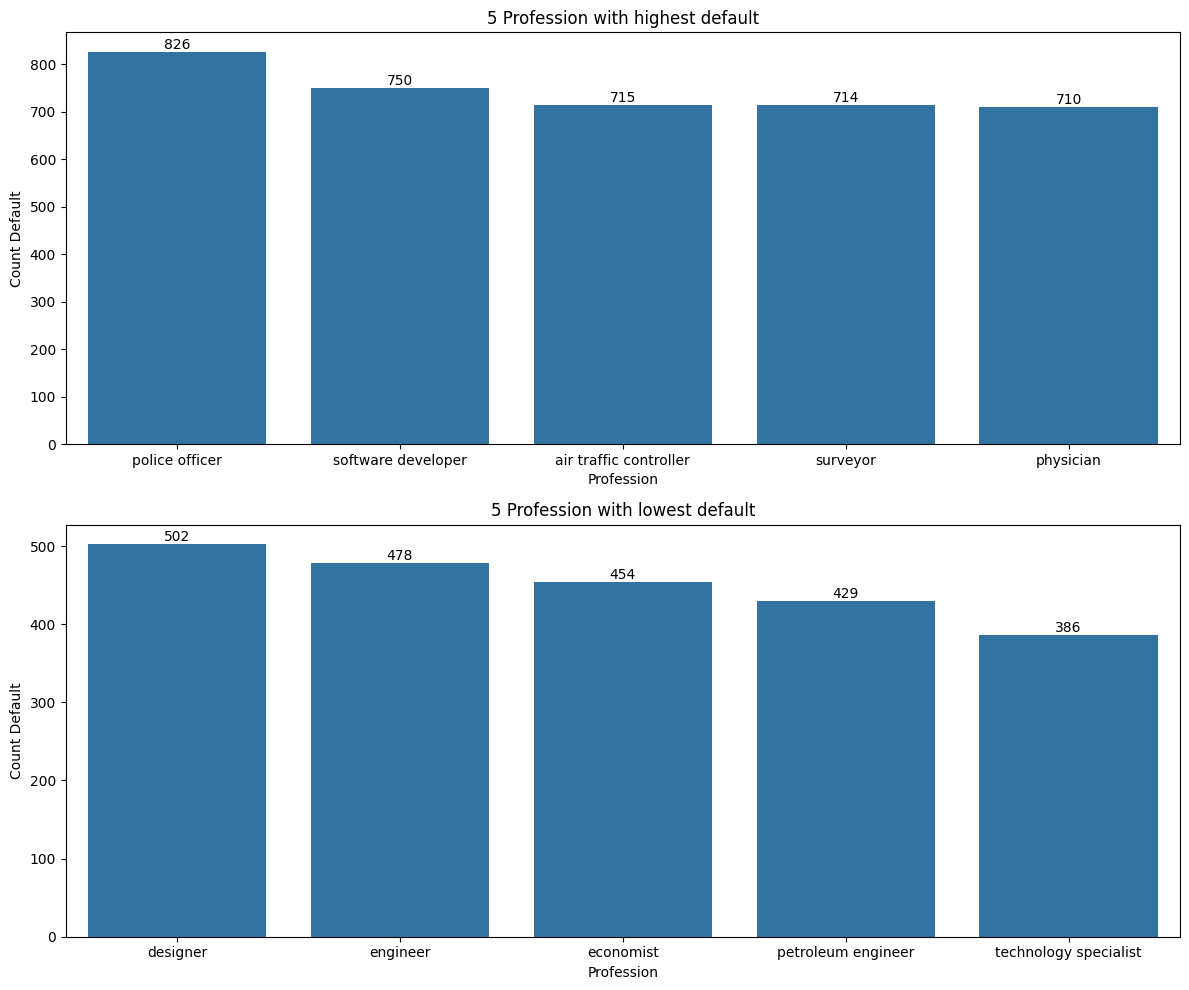

In [ ]:
# Top and Bottom 5 default by profession
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_profession_top_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_profession_top_5, x='Profession', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 Profession with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_profession_bottom_5 = df.groupby('Profession').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_profession_bottom_5, x='Profession', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 Profession with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### Business Insight :

> Police Officer, Software Developer, Air Traffic Controller, Surveyor, and Physician are professions with the highest default rates, while Designer, Engineer, Economist, Petroleum Engineer, and Technology Specialist are professions with the lowest default rates.

#### Business Recommendation :

> Develop specialized risk assessment services tailored for individuals in high-default professions. Utilize advanced data analytics, including behavioral and financial indicators, to provide a more accurate prediction of creditworthiness for applicants in these professions.

> Collaborate with industry associations and employers to gather additional insights into the financial stability and responsibility of individuals in high-risk professions. This collaboration can enhance the accuracy of risk assessments and lead to more informed lending decisions.

> Launch targeted financial education programs specifically designed for individuals in professions with high default rates. These programs can help borrowers manage their finances more effectively, reducing the likelihood of defaults.

### Default by State

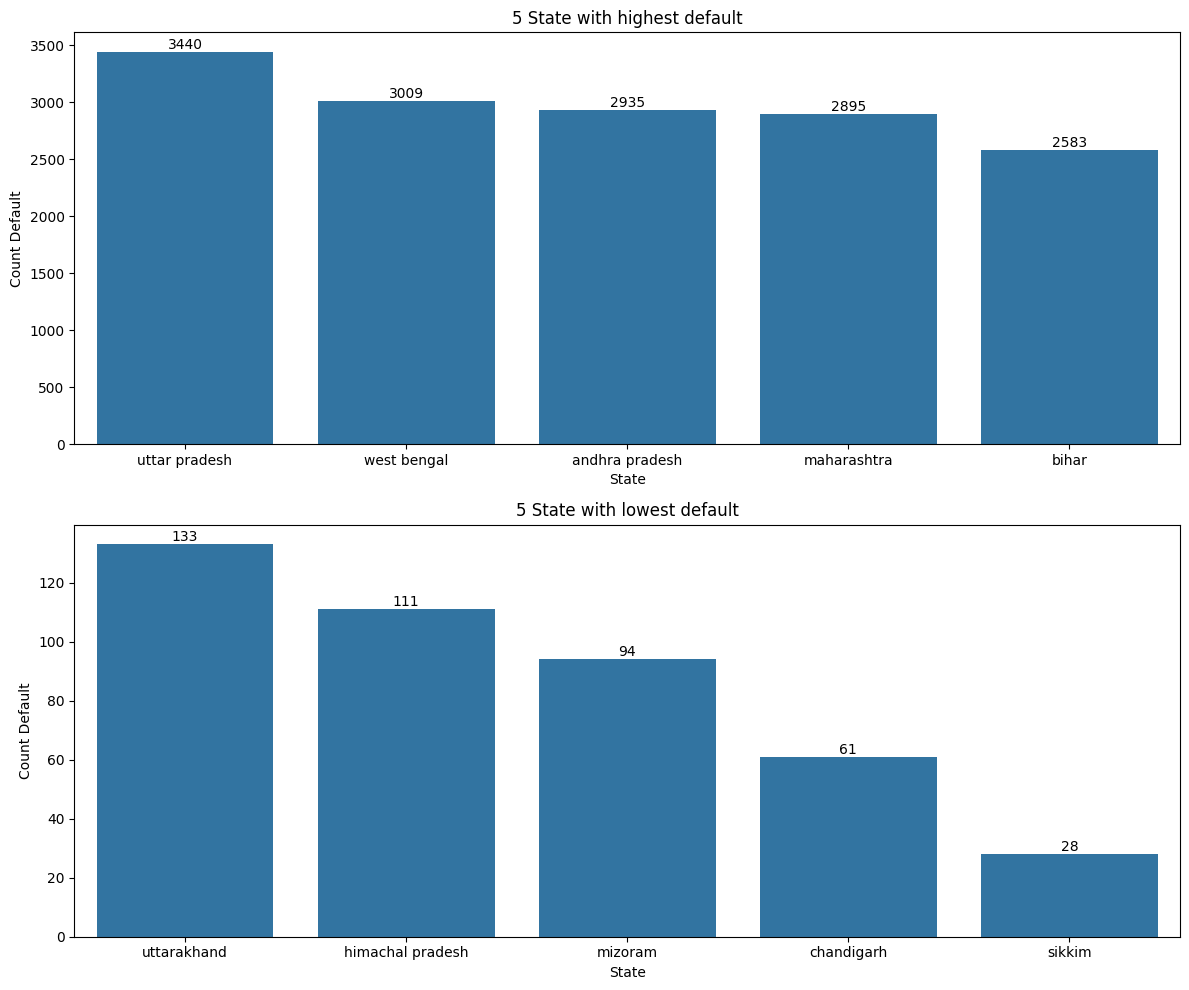

In [ ]:
# Top and Bottom 5 by state
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_state_top_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_state_top_5, x='State', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 State with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_state_bottom_5 = df.groupby('State').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_state_bottom_5, x='State', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 State with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()


#### Business Insight :

> Uttar Pradesh, West Bengal, Andhra Pradesh, Maharashtra, and Bihar are the top 5 states with the highest number of customers with defaults, while Uttarakhand, Himachal Pradesh, Mizoram, Chandigarh, and Sikkim are states with the lowest number of customer defaults. This case is a little bit different from profession case, here we can see that the difference in the amount between the top and bottom are quite high.

#### Business Recommendation :

> Tailor marketing strategies based on the default rates in different states. Allocate marketing budgets and efforts more heavily towards states with lower default rates (e.g., Uttarakhand, Himachal Pradesh), while implementing targeted campaigns or risk mitigation measures in states with higher default rates (e.g., Uttar Pradesh, West Bengal).

> Develop or refine credit risk models specific to each state. Incorporate state-specific economic indicators, socio-economic factors, and regional trends to create more accurate risk assessments for customers in each location.

> Introduce loan products or terms that are customized to the economic conditions and financial behaviors prevalent in each state. This can help align the business's offerings with the specific needs and capacities of customers in different regions.

### Default by City

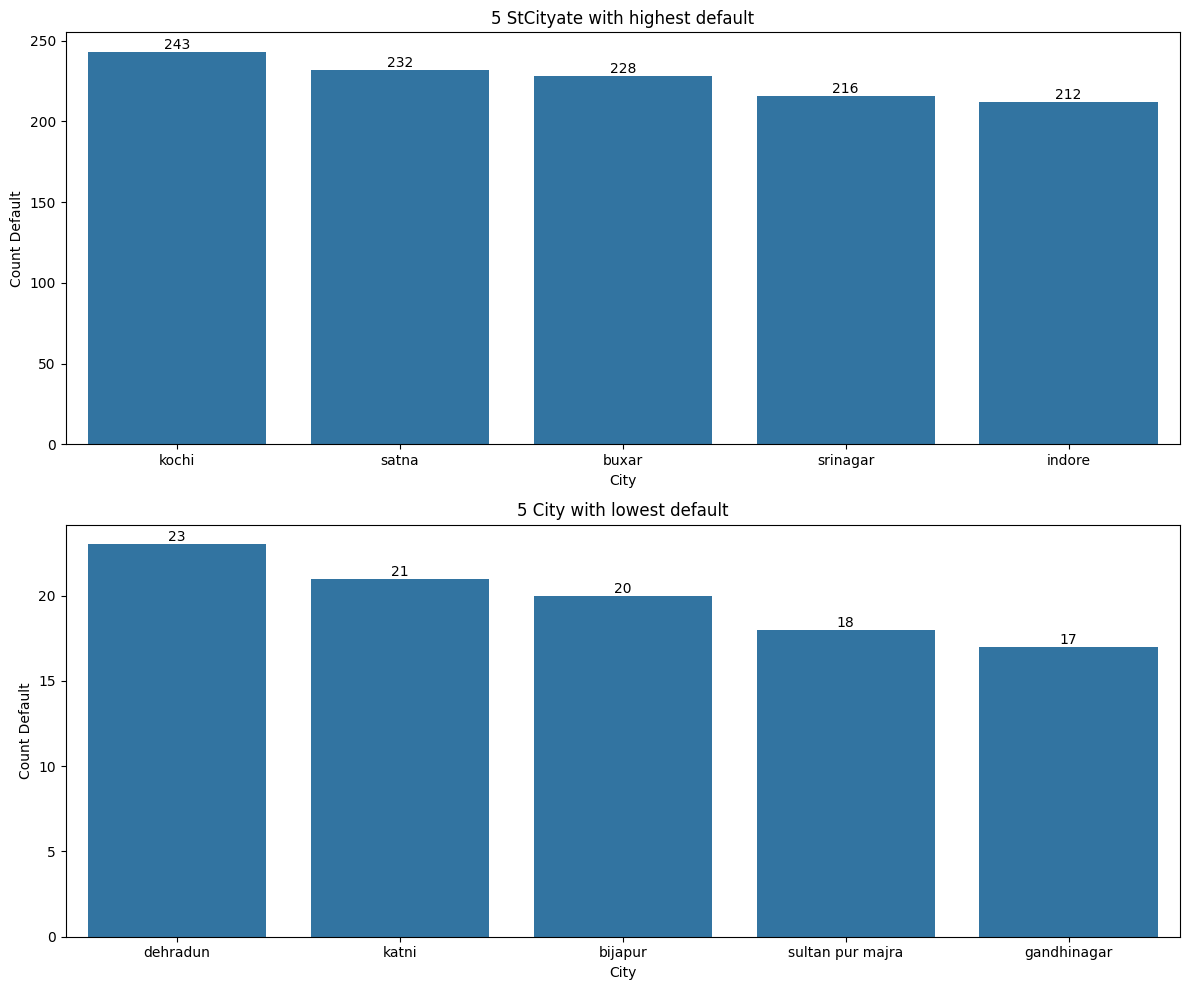

In [ ]:
# Top and Bottom 5 by city
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot top 5
default_state_top_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().head(5)
sns.barplot(data=default_state_top_5, x='City', y='Risk_Flag', ax=ax[0])
ax[0].set_title('5 StCityate with highest default')
ax[0].set_ylabel('Count Default')
ax[0].bar_label(ax[0].containers[0])

# Plot bottom 5
default_state_bottom_5 = df.groupby('City').agg({'Risk_Flag':'sum'}).sort_values(by='Risk_Flag', ascending=False).reset_index().tail(5)
sns.barplot(data=default_state_bottom_5, x='City', y='Risk_Flag', ax=ax[1])
ax[1].set_title('5 City with lowest default')
ax[1].set_ylabel('Count Default')
ax[1].bar_label(ax[1].containers[0])

plt.tight_layout()
plt.show()

#### Business Insight :

> Kochi, Satna, Buxar, Srinagar, and Indore are the top 5 cities with the highest number of customers with defaults, while Latur, Katni, Bijapur, Sultan Pur Majra, and Gandhinagar are cities with the lowest number of customer defaults.

#### Business Recommendation :

> Establish credit counseling centers in cities with high default rates to provide personalized financial advice and assistance to individuals facing repayment challenges.

> Collaborate with local businesses and community organizations to promote these counseling services, creating a network that supports financial well-being at the grassroots level.

> Implement advanced fraud prevention technologies, such as machine learning algorithms and biometric authentication, in cities with high default rates to enhance the security of financial transactions.

# **STAGE 2 : DATA PRE-PROCESSING**

The following important findings were discovered in the previous section:

1. The dataset does not contain missing values, duplicated values, or outliers.

2. For cleaning purposes, further checks may be needed, especially on categorical features with a considerable number of unique values, such as Profession, City, and State. If missing or duplicated values emerge after cleaning, they will be addressed through either dropping or filling with the modes.

3. Scaling is necessary for numerical features with large scales, such as Income and/or age (also with other engineered features later).

# Feature Engineering

In [12]:
# Make a copy of original dataframe for preprocessing and encoding process
df_encoding = df.copy()
df_encoding.head()

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
0  1303834   23           3         single          rented            no   
1  7574516   40          10         single          rented            no   
2  3991815   66           4        married          rented            no   
3  6256451   41           2         single          rented           yes   
4  5768871   47          11         single          rented            no   

            Profession             City           State  Current_Job_Years  \
0  mechanical engineer             rewa  madhya pradesh                  3   
1   software developer         parbhani     maharashtra                  9   
2     technical writer        alappuzha          kerala                  4   
3   software developer      bhubaneswar          odisha                  2   
4        civil servant  tiruchirappalli      tamil nadu                  3   

   Current_House_Years  Risk_Flag  
0                   13          0  
1                   13          0  
2                   10          0  
3                   12          1  
4                   14          1

> **!Update (2 code below)**: I just realized that when i check on the duplicate after cleaning, the .duplicated() method detect some duplicate values, and i was kinda curious why is that happened so i re-check the dataframe to see which ones are the duplicate values, but it turns out that it probably just due to similar names of profession, state, or state so we don't need to handle those.

In [ ]:
# Re-check the amount of duplicated values
df_encoding.duplicated().sum()

208810

In [ ]:
# Check duplicated values in dataframe for confirmation
df_encoding[df_encoding.duplicated()]

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
5366    7574516   40          10         single          rented            no   
5367    3991815   66           4        married          rented            no   
5368    6256451   41           2         single          rented           yes   
5370    6915937   64           0         single          rented            no   
5371    3954973   58          14        married          rented            no   
...         ...  ...         ...            ...             ...           ...   
215992  9482746   68          10         single          rented            no   
215993  4590372   42          16         single          rented            no   
215994  4727841   52           8         single          rented            no   
215995  5000063   38          17         single          rented            no   
215996   120605   22           7         single          rented            no   

                   Profession                  City           State  \
5366       software developer              parbhani     maharashtra   
5367         technical writer             alappuzha          kerala   
5368       software developer           bhubaneswar          odisha   
5370            civil servant               jalgaon     maharashtra   
5371                librarian              tiruppur      tamil nadu   
...                       ...                   ...             ...   
215992              physician                indore  madhya pradesh   
215993          hotel manager          shahjahanpur   uttar pradesh   
215994  technology specialist                tenali  andhra pradesh   
215995  technology specialist           yamunanagar         haryana   
215996    industrial engineer  bhalswa jahangir pur           delhi   

        Current_Job_Years  Current_House_Years  Risk_Flag  
5366                    9                   13          0  
5367                    4                   10          0  
5368                    2                   12          1  
5370                    0                   12          0  
5371                    8                   12          0  
...                   ...                  ...        ...  
215992                  6                   11          1  
215993                  7                   11          0  
215994                  8                   12          0  
215995                  5                   11          1  
215996                  7                   10          0  

[208810 rows x 12 columns]

## Cleaning and Encoding for Profession

In [ ]:
# Checking every unique values in Profession
df_encoding['Profession'].unique()

array(['mechanical engineer', 'software developer', 'technical writer',
       'civil servant', 'librarian', 'economist', 'flight attendant',
       'architect', 'designer', 'physician', 'financial analyst',
       'air traffic controller', 'politician', 'police officer', 'artist',
       'surveyor', 'design engineer', 'chemical engineer',
       'hotel manager', 'dentist', 'comedian', 'biomedical engineer',
       'graphic designer', 'computer hardware engineer',
       'petroleum engineer', 'secretary', 'computer operator',
       'chartered accountant', 'technician', 'microbiologist',
       'fashion designer', 'aviator', 'psychologist', 'magistrate',
       'lawyer', 'firefighter', 'engineer', 'official', 'analyst',
       'geologist', 'drafter', 'statistician', 'web designer',
       'consultant', 'chef', 'army officer', 'surgeon', 'scientist',
       'civil engineer', 'industrial engineer', 'technology specialist'],
      dtype=object)

- There is nothing unusual about each value in the 'profession' feature. Besides performing frequency (count) analysis for the original values, we will also consider adding a feature engineering step by creating new groupings based on the profession types (e.g., Engineer, Government and Public Service, etc.).

- Encoding will be applied during the grouping process as it requires information about the names of each profession to create the groups.

## Cleaning and Encoding for State

In [ ]:
# Checking every unique values in State
df_encoding['State'].unique()

array(['madhya pradesh', 'maharashtra', 'kerala', 'odisha', 'tamil nadu',
       'gujarat', 'rajasthan', 'telangana', 'bihar', 'andhra pradesh',
       'west bengal', 'haryana', 'puducherry', 'karnataka',
       'uttar pradesh', 'himachal pradesh', 'punjab', 'tripura',
       'uttarakhand', 'jharkhand', 'mizoram', 'assam',
       'jammu and kashmir', 'delhi', 'chhattisgarh', 'chandigarh',
       'manipur', 'sikkim'], dtype=object)

- There is nothing unusual about each value in the State feature. The approach will be similar to the Profession, where, in addition to performing frequency (count) encoding, grouping based on the regional zones in India (west, south, east, and west) will be conducted. This process may require some additional research and extra effort during verification.

In [16]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [13]:
#Frequency/Count Encoding for State
import category_encoders as ce
count_encoder = ce.CountEncoder()

df_encoding['State_Count'] = count_encoder.fit_transform(df_encoding['State'])
df_encoding.sample(5)

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
68911   3536244   33           3         single          rented            no   
92670   5364976   73          13         single          rented            no   
14442     96682   52          16        married          rented            no   
20838   9601253   51          15         single          rented            no   
216927  8320377   74           7         single          rented            no   

                Profession          City           State  Current_Job_Years  \
68911            architect      shivpuri  madhya pradesh                  3   
92670               artist   anantapuram  andhra pradesh                  3   
14442   petroleum engineer       mehsana         gujarat                 11   
20838           politician  ichalkaranji     maharashtra                 10   
216927             aviator        howrah     west bengal                  7   

        Current_House_Years  Risk_Flag  State_Count  
68911                    10          0        14122  
92670                    10          0        25297  
14442                    12          0        11408  
20838                    11          0        25562  
216927                   12          0        23483

In [18]:
# Effect of Frequency/Count or Label Encoding to original feature
original_features = df['State'].unique()
encoded_features = df_encoding['State_Count'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'madhya pradesh' : 14122
'maharashtra' : 25562
'kerala' : 5805
'odisha' : 4658
'tamil nadu' : 16537
'gujarat' : 11408
'rajasthan' : 9174
'telangana' : 7524
'bihar' : 19780
'andhra pradesh' : 25297
'west bengal' : 23483
'haryana' : 7890
'puducherry' : 1433
'karnataka' : 11855
'uttar pradesh' : 29143
'himachal pradesh' : 833
'punjab' : 4720
'tripura' : 809
'uttarakhand' : 1874
'jharkhand' : 8965
'mizoram' : 849
'assam' : 7062
'jammu and kashmir' : 1780
'delhi' : 5490
'chhattisgarh' : 3834
'chandigarh' : 656
'manipur' : 608


## Cleaning and Encoding for City

In [ ]:
# Checking every unique values in City
df_encoding['City'].unique()

array(['rewa', 'parbhani', 'alappuzha', 'bhubaneswar', 'tiruchirappalli',
       'jalgaon', 'tiruppur', 'jamnagar', 'kota', 'karimnagar', 'hajipur',
       'adoni', 'erode', 'kollam', 'madurai', 'anantapuram', 'kamarhati',
       'bhusawal', 'sirsa', 'amaravati', 'secunderabad', 'ahmedabad',
       'ajmer', 'ongole', 'miryalaguda', 'ambattur', 'indore',
       'pondicherry', 'shimoga', 'chennai', 'gulbarga', 'khammam',
       'saharanpur', 'gopalpur', 'amravati', 'udupi', 'howrah',
       'aurangabad', 'hospet', 'shimla', 'khandwa', 'bidhannagar',
       'bellary', 'danapur', 'purnia', 'bijapur', 'patiala', 'malda',
       'sagar', 'durgapur', 'junagadh', 'singrauli', 'agartala',
       'thanjavur', 'hindupur', 'naihati', 'north dumdum', 'panchkula',
       'anantapur', 'serampore', 'bathinda', 'nadiad', 'kanpur',
       'haridwar', 'berhampur', 'jamshedpur', 'hyderabad', 'bidar',
       'kottayam', 'solapur', 'suryapet', 'aizawl', 'asansol', 'deoghar',
       'eluru', 'ulhasnagar', 'a

- There is a case where City new delhi seems to be the same as City delhi city, we will check that.

In [ ]:
df_encoding[df_encoding['City'].str.contains('delhi')]

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
216      152426   27          18         single          rented            no   
219     7115862   52          17         single          rented            no   
332     9815414   26           5         single          rented            no   
379     3498735   38           3         single          rented           yes   
440     8914067   77          18         single          rented           yes   
...         ...  ...         ...            ...             ...           ...   
250931  8614227   44          13         single          rented            no   
251298  3414981   45           0         single          rented            no   
251322  7769323   39          12         single          rented           yes   
251366  4900484   58           6         single          rented            no   
251370  5551100   26          20         single          rented           yes   

                  Profession        City  State  Current_Job_Years  \
216                librarian  delhi city  delhi                  8   
219                physician  delhi city  delhi                 14   
332     chartered accountant   new delhi  delhi                  5   
379               technician   new delhi  delhi                  3   
440                economist  delhi city  delhi                 10   
...                      ...         ...    ...                ...   
250931              comedian   new delhi  delhi                 13   
251298               drafter  delhi city  delhi                  0   
251322            magistrate  delhi city  delhi                 12   
251366          army officer   new delhi  delhi                  6   
251370         civil servant   new delhi  delhi                  4   

        Current_House_Years  Risk_Flag  State_Count  
216                      12          0         5490  
219                      11          0         5490  
332                      14          1         5490  
379                      14          0         5490  
440                      11          0         5490  
...                     ...        ...          ...  
250931                   12          0         5490  
251298                   10          0         5490  
251322                   12          0         5490  
251366                   13          1         5490  
251370                   13          0         5490  

[1694 rows x 13 columns]

In [ ]:
# Checking for similar cases where city name contains 'city' word
df_encoding[df_encoding['City'].str.lower().str.contains('city')]

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
216      152426   27          18         single          rented            no   
219     7115862   52          17         single          rented            no   
246     2252443   77           0         single          rented            no   
254     1923950   50          12         single          rented            no   
440     8914067   77          18         single          rented           yes   
...         ...  ...         ...            ...             ...           ...   
251298  3414981   45           0         single          rented            no   
251322  7769323   39          12         single          rented           yes   
251637   219531   28          15         single          rented            no   
251707  9888940   59          20         single          rented           yes   
251920  1141654   25           9        married          rented            no   

               Profession             City       State  Current_Job_Years  \
216             librarian       delhi city       delhi                  8   
219             physician       delhi city       delhi                 14   
246               surgeon  chandigarh city  chandigarh                  0   
254             geologist  chandigarh city  chandigarh                  3   
440             economist       delhi city       delhi                 10   
...                   ...              ...         ...                ...   
251298            drafter       delhi city       delhi                  0   
251322         magistrate       delhi city       delhi                 12   
251637  computer operator  chandigarh city  chandigarh                  5   
251707          architect  chandigarh city  chandigarh                  3   
251920        firefighter  chandigarh city  chandigarh                  3   

        Current_House_Years  Risk_Flag  State_Count  
216                      12          0         5490  
219                      11          0         5490  
246                      11          0          656  
254                      14          0          656  
440                      11          0         5490  
...                     ...        ...          ...  
251298                   10          0         5490  
251322                   12          0         5490  
251637                   12          1          656  
251707                   11          0          656  
251920                   13          0          656  

[1252 rows x 13 columns]

In [ ]:
df_encoding[df_encoding['City'] == 'chandigarh city']

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
246     2252443   77           0         single          rented            no   
254     1923950   50          12         single          rented            no   
772     3086136   60           9         single          rented            no   
1119    5792307   24           9         single          rented           yes   
1189    1117607   53          13        married          rented           yes   
...         ...  ...         ...            ...             ...           ...   
251021  5756725   70          12         single          rented           yes   
251249  1838739   64           8         single          rented            no   
251637   219531   28          15         single          rented            no   
251707  9888940   59          20         single          rented           yes   
251920  1141654   25           9        married          rented            no   

                 Profession             City       State  Current_Job_Years  \
246                 surgeon  chandigarh city  chandigarh                  0   
254               geologist  chandigarh city  chandigarh                  3   
772                 dentist  chandigarh city  chandigarh                  6   
1119             magistrate  chandigarh city  chandigarh                  8   
1189    mechanical engineer  chandigarh city  chandigarh                  6   
...                     ...              ...         ...                ...   
251021              analyst  chandigarh city  chandigarh                 12   
251249     fashion designer  chandigarh city  chandigarh                  5   
251637    computer operator  chandigarh city  chandigarh                  5   
251707            architect  chandigarh city  chandigarh                  3   
251920          firefighter  chandigarh city  chandigarh                  3   

        Current_House_Years  Risk_Flag  State_Count  
246                      11          0          656  
254                      14          0          656  
772                      13          0          656  
1119                     13          0          656  
1189                     10          0          656  
...                     ...        ...          ...  
251021                   12          0          656  
251249                   10          0          656  
251637                   12          1          656  
251707                   11          0          656  
251920                   13          0          656  

[656 rows x 13 columns]

In [ ]:
df_encoding[df_encoding['City'] == 'delhi city']

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
216      152426   27          18         single          rented            no   
219     7115862   52          17         single          rented            no   
440     8914067   77          18         single          rented           yes   
617     8755938   42          20         single          rented           yes   
840     6550448   77           7         single          rented           yes   
...         ...  ...         ...            ...             ...           ...   
249961  7628126   51           6         single          rented           yes   
250241  7771350   51          13         single          rented            no   
250780  6718403   43          13         single          rented            no   
251298  3414981   45           0         single          rented            no   
251322  7769323   39          12         single          rented           yes   

                 Profession        City  State  Current_Job_Years  \
216               librarian  delhi city  delhi                  8   
219               physician  delhi city  delhi                 14   
440               economist  delhi city  delhi                 10   
617     biomedical engineer  delhi city  delhi                 14   
840        fashion designer  delhi city  delhi                  7   
...                     ...         ...    ...                ...   
249961              aviator  delhi city  delhi                  6   
250241            economist  delhi city  delhi                  9   
250780         army officer  delhi city  delhi                 12   
251298              drafter  delhi city  delhi                  0   
251322           magistrate  delhi city  delhi                 12   

        Current_House_Years  Risk_Flag  State_Count  
216                      12          0         5490  
219                      11          0         5490  
440                      11          0         5490  
617                      13          1         5490  
840                      13          0         5490  
...                     ...        ...          ...  
249961                   12          0         5490  
250241                   11          0         5490  
250780                   12          0         5490  
251298                   10          0         5490  
251322                   12          0         5490  

[596 rows x 13 columns]

In [ ]:
df_encoding[df_encoding['City'] == 'chandigarh city'].shape[0] + df_encoding[df_encoding['City'] == 'delhi city'].shape[0]

1252

The case of cities that have the word '_city' is only owned by chandigarh city and delhi city (seen from the sum of rows). The cities involved are only in delhi city which is similar to new delhi because they both have the same state.

In [14]:
# Replace Delhi_city city to New_Delhi
df['City'] = df['City'].replace('delhi city', 'new delhi')

In [15]:
# Frequency/Count Encoding for City
df_encoding['City_Count'] = count_encoder.fit_transform(df_encoding['City'])
df_encoding.sample(5)

Income  Age  Experience Marital_Status House_Ownership Car_Ownership  \
213151  5345253   61           7         single          rented            no   
19870   6626762   24           2         single          rented            no   
216963   918785   65           3         single          rented            no   
168344  1735303   41           7         single          rented            no   
213464  7450859   57          17         single          rented           yes   

                 Profession                   City          State  \
213151   petroleum engineer               uluberia    west bengal   
19870             librarian                 rampur  uttar pradesh   
216963          firefighter  sangli-miraj & kupwad    maharashtra   
168344  biomedical engineer           north dumdum    west bengal   
213464            geologist                 mysore      karnataka   

        Current_Job_Years  Current_House_Years  Risk_Flag  State_Count  \
213151                  3                   13          0        23483   
19870                   2                   10          0        29143   
216963                  3                   13          0        25562   
168344                  7                   11          0        23483   
213464                  7                   14          1        11855   

        City_Count  
213151         777  
19870          648  
216963         639  
168344         768  
213464         739

In [16]:
# Effect of Frequency/Count or Label Encoding to original feature
original_features = df['City'].unique()
encoded_features = df_encoding['City_Count'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

'rewa' : 798
'parbhani' : 849
'alappuzha' : 688
'bhubaneswar' : 607
'tiruchirappalli' : 809
'jalgaon' : 857
'tiruppur' : 834
'jamnagar' : 862
'kota' : 660
'karimnagar' : 740
'hajipur' : 1098
'adoni' : 953
'erode' : 1064
'kollam' : 741
'madurai' : 757
'anantapuram' : 994
'kamarhati' : 775
'bhusawal' : 706
'sirsa' : 885
'amaravati' : 840
'secunderabad' : 612
'ahmedabad' : 649
'ajmer' : 829
'ongole' : 1067
'miryalaguda' : 931
'ambattur' : 1130
'indore' : 897
'pondicherry' : 773
'shimoga' : 608
'chennai' : 810
'gulbarga' : 1051
'khammam' : 794
'saharanpur' : 725
'gopalpur' : 760
'amravati' : 687
'udupi' : 1016
'howrah' : 1543
'aurangabad' : 1058
'hospet' : 833
'shimla' : 614
'khandwa' : 1033
'bidhannagar' : 1065
'bellary' : 1037
'danapur' : 494
'purnia' : 572
'bijapur' : 540
'patiala' : 866
'malda' : 769
'sagar' : 684
'durgapur' : 1003
'junagadh' : 683
'singrauli' : 768
'agartala' : 624
'thanjavur' : 579
'hindupur' : 738
'naihati' : 844
'north dumdum' : 896
'panchkula' : 913
'anantapur' : 

## Encoding for Marital_Status, House_Ownership, Car_Ownership

In [17]:
cats_few

['Marital_Status', 'House_Ownership', 'Car_Ownership']

In [18]:
# Label encoding for Marital_Status, House_Ownership, Car_Ownership
df_encoding.replace({'Marital_Status':{'single': 0, 'married' : 1},
                     'House_Ownership':{'norent_noown' : 0, 'rented' : 1, 'owned' : 2},
                     'Car_Ownership':{'no': 0, 'yes': 1 }},
                      inplace=True)

for feature in cats_few :
  df_encoding[feature] = df_encoding[feature].astype('int64')

## Feature Extraction

### Profession_Group Extraction

In [23]:
# Profession feature before encoding
print(f"Number of unique profession: {df_encoding['Profession'].nunique()}")
print(df_encoding['Profession'].unique())

Number of unique profession: 51
['mechanical engineer' 'software developer' 'technical writer'
 'civil servant' 'librarian' 'economist' 'flight attendant' 'architect'
 'designer' 'physician' 'financial analyst' 'air traffic controller'
 'politician' 'police officer' 'artist' 'surveyor' 'design engineer'
 'chemical engineer' 'hotel manager' 'dentist' 'comedian'
 'biomedical engineer' 'graphic designer' 'computer hardware engineer'
 'petroleum engineer' 'secretary' 'computer operator'
 'chartered accountant' 'technician' 'microbiologist' 'fashion designer'
 'aviator' 'psychologist' 'magistrate' 'lawyer' 'firefighter' 'engineer'
 'official' 'analyst' 'geologist' 'drafter' 'statistician' 'web designer'
 'consultant' 'chef' 'army officer' 'surgeon' 'scientist' 'civil engineer'
 'industrial engineer' 'technology specialist']


In [19]:
# Profession Grouping
profession_groups = {
    'engineering': ['engineer', 'mechanical engineer', 'civil engineer', 'industrial engineer', 'design engineer', 'chemical engineer', 'biomedical engineer', 'computer hardware engineer', 'petroleum engineer', 'surveyor', 'drafter'],
    'technology': ['software developer', 'computer operator', 'technology specialist', 'web designer', 'technician'],
    'healthcare': ['physician', 'dentist', 'surgeon', 'psychologist'],
    'finance': ['economist', 'financial analyst', 'chartered accountant'],
    'design': ['architect', 'designer', 'graphic designer', 'fashion designer', 'artist'],
    'aviation': ['flight attendant', 'air traffic controller', 'aviator'],
    'government public service': ['civil servant', 'politician', 'police officer', 'magistrate', 'army officer', 'firefighter', 'lawyer', 'official', 'librarian'],
    'business management' : ['hotel manager', 'consultant', 'secretary'],
    'science research' : ['scientist', 'microbiologist', 'geologist', 'statistician', 'analyst'],
    'miscellaneous': ['comedian', 'chef', 'technical writer']
}

df_encoding['Profession_Group'] = df_encoding['Profession'].map({prof: group for group, prof_list in profession_groups.items() for prof in prof_list})

In [20]:
# Re-check whether we got missing profession that is not grouped

# Extract all unique professions from the dataframe
all_professions = set(df_encoding['Profession'])

# Extract all professions listed in the profession_groups dictionary
grouped_professions = set(prof for prof_list in profession_groups.values() for prof in prof_list)

# Find the professions that are missing in the grouping process
missing_professions = all_professions - grouped_professions

# Check if there are missing professions and print a message if so
if missing_professions:
    print("Professions missed in the grouping process:")
    for profession in missing_professions:
        print(profession)
else:
    print("All professions are properly grouped.")

All professions are properly grouped.


In [21]:
#One-hot Encoding for Profession grouping
onehots = pd.get_dummies(df_encoding['Profession_Group'], prefix='Prof')
onehots = onehots.astype(int)
df_encoding = pd.concat([df_encoding, onehots], axis=1)

#Drop the Profession_Group after one-hot encoding
df_encoding.drop(columns='Profession_Group', inplace=True)

In [22]:
#Frequency/Count Encoding for original Profession
df_encoding['Profession_Count'] = count_encoder.fit_transform(df_encoding['Profession'])

In [23]:
#Effect of Frequency/Count or Label Encoding to original feature
original_features = df['Profession'].unique()
encoded_features = df_encoding['Profession_Count'].unique()
for feature, encoded_feature in zip(original_features, encoded_features):
    print(f"'{feature}' : {encoded_feature}")

#Drop the original Profession after frequency encoding
df_encoding.drop(columns='Profession', inplace=True)

'mechanical engineer' : 5217
'software developer' : 5053
'technical writer' : 5195
'civil servant' : 4413
'librarian' : 4628
'economist' : 4573
'flight attendant' : 5128
'architect' : 4657
'designer' : 4598
'physician' : 5957
'financial analyst' : 5167
'air traffic controller' : 5281
'politician' : 4944
'police officer' : 5035
'artist' : 4861
'surveyor' : 4714
'design engineer' : 4729
'chemical engineer' : 5205
'hotel manager' : 5178
'dentist' : 4782
'comedian' : 5259
'biomedical engineer' : 5127
'graphic designer' : 5166
'computer hardware engineer' : 5372
'petroleum engineer' : 5041
'secretary' : 5061
'computer operator' : 4990
'chartered accountant' : 4493
'technician' : 4864
'microbiologist' : 4881
'fashion designer' : 5304
'aviator' : 4758
'psychologist' : 5390
'magistrate' : 5357
'lawyer' : 4818
'firefighter' : 4507
'engineer' : 4048
'official' : 4087
'analyst' : 4668
'geologist' : 4672
'drafter' : 5359
'statistician' : 5806
'web designer' : 5397
'consultant' : 4808
'chef' : 4635

In [24]:
# Check profession and profession_group after encoding
df_encoding.head()

Income  Age  Experience  Marital_Status  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

              City           State  Current_Job_Years  Current_House_Years  \
0             rewa  madhya pradesh                  3                   13   
1         parbhani     maharashtra                  9                   13   
2        alappuzha          kerala                  4                   10   
3      bhubaneswar          odisha                  2                   12   
4  tiruchirappalli      tamil nadu                  3                   14   

   Risk_Flag  State_Count  City_Count  Prof_aviation  \
0          0        14122         798              0   
1          0        25562         849              0   
2          0         5805         688              0   
3          1         4658         607              0   
4          1        16537         809              0   

   Prof_business management  Prof_design  Prof_engineering  Prof_finance  \
0                         0            0                 1             0   
1                         0            0                 0             0   
2                         0            0                 0             0   
3                         0            0                 0             0   
4                         0            0                 0             0   

   Prof_government public service  Prof_healthcare  Prof_miscellaneous  \
0                               0                0                   0   
1                               0                0                   0   
2                               0                0                   1   
3                               0                0                   0   
4                               1                0                   0   

   Prof_science research  Prof_technology  Profession_Count  
0                      0                0              5217  
1                      0                1              5053  
2                      0                0              5195  
3                      0                1              5053  
4                      0                0              4413

### Generation Extraction

In [25]:
# Function to determine the generation based on age
def assign_generation(age):
    if age <= 27:
        return 'Generation Z'
    elif age <= 43:
        return 'Generation Millenials'
    elif age < 59:
        return 'Generation X'
    elif age < 69:
        return 'Boomers II'
    elif age <= 78:
        return 'Boomers I'
    else:
        return 'Other'

df_encoding['Generation'] = df_encoding['Age'].apply(assign_generation)

Reference : https://www.beresfordresearch.com/age-range-by-generation/

In [26]:
# Label Encoding for Generation
df_encoding['Generation'].replace({'Generation Z': 0,
                                   'Generation Millenials': 1,
                                   'Generation X' : 2,
                                   'Boomers II' : 3,
                                   'Boomers I' : 4,
                                   'Other' : 5},inplace=True)

df_encoding['Generation'] = df_encoding['Generation'].astype('int64')

### Income_Level Extraction

In [27]:
# Function to determine the income level based on income
q1 = np.percentile(df['Income'], 25)
q2 = np.percentile(df['Income'], 50)
q3 = np.percentile(df['Income'], 75)

def assign_income_level(income):
    if income <= q1:
        return 'Low Income'
    elif income <= q2:
        return 'Medium-Low Income'
    elif income <= q3:
        return 'Medium-High Income'
    else :
        return 'High Income'

df_encoding['Income_Level'] = df_encoding['Income'].apply(assign_income_level)

In [28]:
# Label encoding for income level
df_encoding['Income_Level'].replace({'Low Income': 0,
                                     'Medium-Low Income': 1,
                                     'Medium-High Income' : 2,
                                     'High Income' : 3},inplace=True)

df_encoding['Income_Level'] = df_encoding['Income_Level'].astype('int64')

### Experience_Level Extraction

In [29]:
# Function to determine the experience level based on years of experience
def assign_experience_level(experience):
    if experience <= 5:
        return 'Entry Level'
    elif experience <= 10:
        return 'Mid-Level'
    elif experience <= 15:
        return 'Senior Level'
    else :
        return 'Executive Level'

df_encoding['Experience_Level'] = df_encoding['Experience'].apply(assign_experience_level)

In [30]:
# Label encoding for experience level
df_encoding['Experience_Level'].replace({'Entry Level': 0,
                                         'Mid-Level': 1,
                                         'Senior Level' : 2,
                                         'Executive Level' : 3},inplace=True)

df_encoding['Experience_Level'] = df_encoding['Experience_Level'].astype('int64')

### State_Group Extraction

In [31]:
# Function for grouping state
def state_group(state) :
    if state in ['uttar pradesh', 'haryana', 'jammu and kashmir', 'punjab', 'uttarakhand', 'chandigarh', 'delhi', 'himachal pradesh'] :
        return 'north_zone'
    elif state in ['bihar', 'jharkhand', 'odisha', 'west bengal', 'assam', 'sikkim', 'tripura', 'mizoram', 'manipur'] :
        return 'east_zone'
    elif state in ['andhra pradesh', 'tamil nadu', 'karnataka', 'telangana', 'kerala', 'puducherry'] :
        return 'south_zone'
    else :
        return 'west_zone'

df_encoding['State_Group'] = df_encoding['State'].apply(state_group)

In [32]:
df_encoding['State_Group'].value_counts()

State_Group
south_zone    68451
east_zone     67063
west_zone     64100
north_zone    52386
Name: count, dtype: int64

In [33]:
#One-hot Encoding for State grouping
onehots = pd.get_dummies(df_encoding['State_Group'], prefix='State')
onehots = onehots.astype(int)
df_encoding = pd.concat([df_encoding, onehots], axis=1)

#Drop the original State and State_Group after one-hot encoding
df_encoding.drop(columns=['State', 'State_Group'], inplace=True)

### City_Group Extraction

In [34]:
# Function for grouping city
def city_group(city):
    if city in ['new delhi', 'mumbai', 'kolkata', 'chennai', 'bangalore']:
        return 'metro'
    elif city in ['ahmedabad', 'hyderabad', 'pune', 'surat', 'jaipur', 'lucknow', 'kanpur', 'nagpur', 'visakhapatnam', 'indore', 'thane',
                  'bhopal', 'pimpri-chinchwad', 'patna', 'vadodara', 'ghaziabad', 'ludhiana', 'agra', 'nashik', 'faridabad', 'meerut', 'rajkot',
                  'varanasi', 'srinagar', 'amritsar', 'allahabad', 'jabalpur', 'gwalior', 'vijayawada', 'jodhpur', 'raipur', 'kota', 'guwahati', 'chandigarh city']:
        return 'urban'
    elif city in ['navi mumbai', 'kalyan-dombivli', 'vasai-virar', 'mira-bhayandar', 'thiruvananthapuram', 'bhiwandi', 'noida', 'bhopal', 'howrah', 'saharanpur',
                  'berhampur', 'suryapet', 'muzaffarpur', 'nadiad', 'siliguri', 'bhavnagar', 'kurnool', 'tenali', 'satna', 'nandyal', 'etawah', 'morena', 'ballia',
                  'machilipatnam', 'mau', 'machilipatnam', 'bhagalpur', 'siwan', 'meerut', 'dibrugarh', 'gaya', 'darbhanga', 'hajipur', 'mirzapur', 'akola', 'satna',
                  'motihari', 'jalna', 'ramgarh', 'ozhukarai', 'saharsa', 'munger', 'farrukhabad', 'nangloi jat', 'thoothukudi', 'nagercoil', 'rourkela', 'jhansi', 'sultan pur majra']:
        return 'suburban'
    else:
        return 'rural'

df_encoding['City_Group'] = df_encoding['City'].apply(city_group)

In [35]:
df_encoding['City_Group'].value_counts()

City_Group
rural       182558
suburban     36612
urban        28703
metro         4127
Name: count, dtype: int64

In [36]:
#One-hot Encoding for City grouping
onehots = pd.get_dummies(df_encoding['City_Group'], prefix='City')
onehots = onehots.astype(int)
df_encoding = pd.concat([df_encoding, onehots], axis=1)

#Drop the original City and City_Group after one-hot encoding
df_encoding.drop(columns=['City', 'City_Group'], inplace=True)

### Income_Age_Ratio Extraction

In [37]:
# Ratio Income by Age
df_encoding['Income_Age_Ratio'] = df_encoding['Income'] / df_encoding['Age']

### Experience_Age_Ratio Extraction

In [38]:
# Ratio Experience by Age
df_encoding['Experience_Age_Ratio'] = df_encoding['Experience'] / df_encoding['Age']

### Job_House_Duration_Ratio Extraction

In [39]:
# Ratio Current_Job_Years by Jumlah Tahun Current_House_Years
df_encoding['Job_House_Duration_Ratio'] = df_encoding['Current_Job_Years'] / df_encoding['Current_House_Years']

# Feature Selection

In [40]:
# Re-arrange the columns (Risk_Flag in last)
df_1 = df_encoding.drop(columns='Risk_Flag')
df_2 = df_encoding['Risk_Flag']
df_encoding = pd.concat([df_1, df_2], axis='columns')

In [41]:
# Check final dataframe after encoding
df_encoding.head()

Income  Age  Experience  Marital_Status  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

   Current_Job_Years  Current_House_Years  State_Count  City_Count  \
0                  3                   13        14122         798   
1                  9                   13        25562         849   
2                  4                   10         5805         688   
3                  2                   12         4658         607   
4                  3                   14        16537         809   

   Prof_aviation  Prof_business management  Prof_design  Prof_engineering  \
0              0                         0            0                 1   
1              0                         0            0                 0   
2              0                         0            0                 0   
3              0                         0            0                 0   
4              0                         0            0                 0   

   Prof_finance  Prof_government public service  Prof_healthcare  \
0             0                               0                0   
1             0                               0                0   
2             0                               0                0   
3             0                               0                0   
4             0                               1                0   

   Prof_miscellaneous  Prof_science research  Prof_technology  \
0                   0                      0                0   
1                   0                      0                1   
2                   1                      0                0   
3                   0                      0                1   
4                   0                      0                0   

   Profession_Count  Generation  Income_Level  Experience_Level  \
0              5217           0             0                 0   
1              5053           1             3                 1   
2              5195           3             1                 0   
3              5053           1             2                 0   
4              4413           2             2                 2   

   State_east_zone  State_north_zone  State_south_zone  State_west_zone  \
0                0                 0                 0                1   
1                0                 0                 0                1   
2                0                 0                 1                0   
3                1                 0                 0                0   
4                0                 0                 1                0   

   City_metro  City_rural  City_suburban  City_urban  Income_Age_Ratio  \
0           0           1              0           0      56688.434783   
1           0           1              0           0     189362.900000   
2           0           1              0           0      60482.045455   
3           0           1              0           0     152596.365854   
4           0           1              0           0     122741.936170   

   Experience_Age_Ratio  Job_House_Duration_Ratio  Risk_Flag  
0              0.130435                  0.230769          0  
1              0.250000                  0.692308          0  
2              0.060606                  0.400000          0  
3              0.048780                  0.166667          1  
4              0.234043                  0.214286          1

## Checking correlation heatmap (spearman method)

### Additional Information Regarding Correlation Score Calculation Method using `df.corr()`

Pearson, Spearman, and Kendall are three different methods used to measure the correlation between two variables. While they all assess the relationship between variables, they operate based on different principles and are suitable for different types of data.

1. **Pearson Correlation Coefficient:**
   - **Type of Variables:** Pearson correlation is used for linear relationships between two continuous variables.
   - **Assumptions:** It assumes that the variables are normally distributed and have a linear relationship.
   - **Strengths:** It is sensitive to linear relationships and is easy to interpret.
   - **Formula:** The Pearson correlation coefficient is calculated as the covariance of the two variables divided by the product of their standard deviations.

2. **Spearman Rank Correlation Coefficient:**
   - **Type of Variables:** Spearman correlation is a non-parametric method used when the relationship between variables is monotonic but not necessarily linear. It can be applied to ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume that the variables are normally distributed.
   - **Strengths:** It is less sensitive to outliers than Pearson correlation and can capture non-linear relationships.
   - **Procedure:** Instead of working with the actual values of the variables, Spearman's method involves ranking the data and then computing the Pearson correlation on the ranks.

3. **Kendall Tau Rank Correlation Coefficient:**
   - **Type of Variables:** Like Spearman, Kendall correlation is a non-parametric measure suitable for ordinal, interval, or ratio data.
   - **Assumptions:** It does not assume normal distribution and is robust against outliers.
   - **Strengths:** It is also less sensitive to outliers and is particularly useful when dealing with tied ranks.
   - **Procedure:** Similar to Spearman, Kendall's method involves ranking the data, and the correlation is computed based on concordant and discordant pairs of ranks.

**Summary:**
- Pearson is for linear relationships between continuous variables and assumes normal distribution.
- Spearman is for monotonic relationships (not necessarily linear) and is non-parametric.
- Kendall is for monotonic relationships as well, is non-parametric, and is often preferred when dealing with tied ranks.

The choice between these methods depends on the nature of your data and the assumptions you are willing to make about the underlying distribution of the variables. If in doubt, Spearman and Kendall are often safer choices, especially when dealing with non-normally distributed data or ordinal variables.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


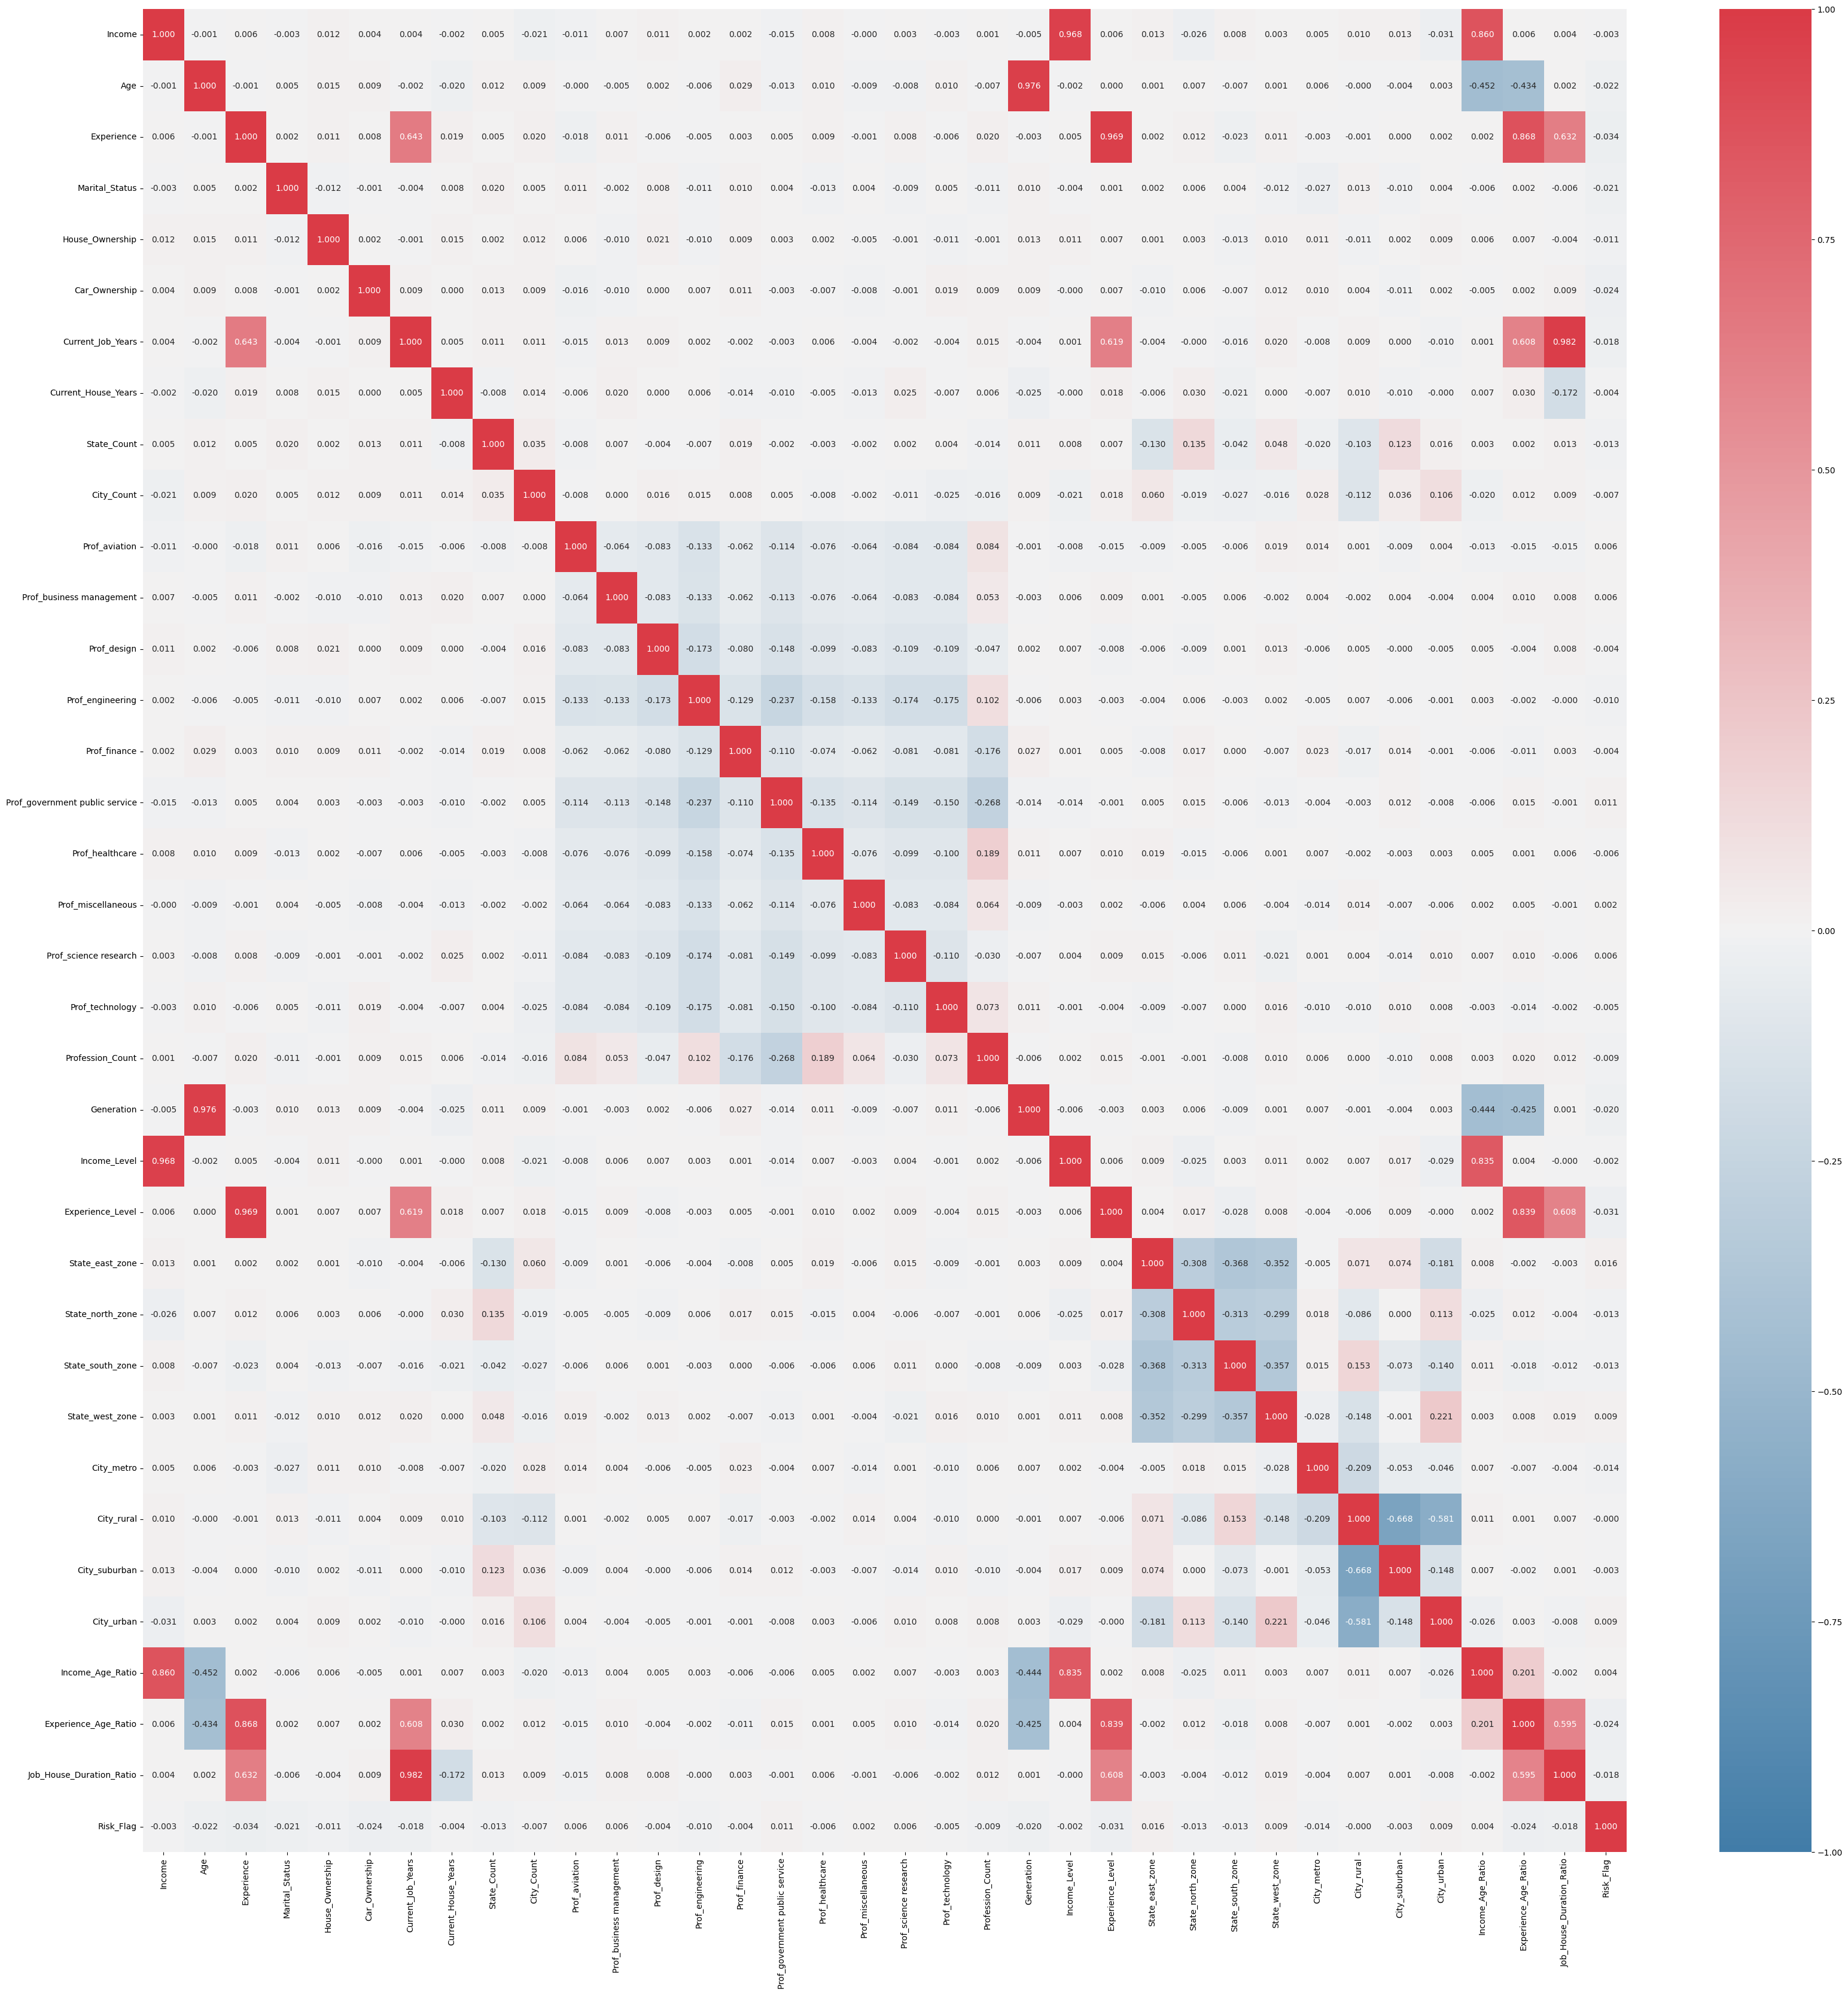

In [ ]:
# Heatmap (spearman corr)
plt.figure(figsize=(40,40))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df_encoding.corr(method='spearman', numeric_only=True), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

## Checking multicolinearity using Variance Inflation Factor (VIF)

### Additional Information Regarding Variance Inflation Factor (VIF)

The `variance_inflation_factor` function from `statsmodels.stats.outliers_influence` module is used to compute the Variance Inflation Factor (VIF) for a set of independent variables in a regression model. VIF measures the extent to which the variance of an estimated regression coefficient is increased due to collinearity.

In other words, VIF helps to identify the presence of multicollinearity among the independent variables in a regression model. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. This can cause issues in the regression analysis, such as unstable coefficients estimates and inflated standard errors, which can lead to difficulties in interpreting the model and potentially incorrect conclusions.

The VIF for each independent variable is calculated as the ratio of the variance of the coefficient estimate of that variable when it is included in a regression model with all other independent variables, divided by the variance of the coefficient estimate of that variable when it is fit in a regression model on its own. Mathematically, for the \(i\)-th independent variable, the VIF is calculated as:

\[
\text{VIF}_i = \frac{1}{1 - R_i^2}
\]

Where \(R_i^2\) is the \(R^2\) value obtained from regressing the \(i\)-th independent variable against all other independent variables.

The interpretation of VIF is straightforward:
- A VIF of 1 indicates no multicollinearity.
- VIF values greater than 1 indicate increasing levels of multicollinearity.
- Typically, a VIF greater than 5 or 10 is considered problematic, indicating significant multicollinearity.

By computing VIF for each independent variable, you can identify which variables are contributing to multicollinearity in the model. This information can help in deciding whether to remove certain variables from the model, re-specify the model, or employ other techniques to mitigate multicollinearity issues.

Using the Variance Inflation Factor (VIF) for multicollinearity assessment is more commonly associated with regression tasks, where you're trying to model the relationship between independent variables and a continuous outcome variable. However, multicollinearity can also be a concern in classification tasks, especially if you're using models that involve estimating coefficients or weights for predictor variables.

For example, in logistic regression (a common method for classification), multicollinearity among predictor variables can affect the stability of coefficient estimates and the interpretation of odds ratios. In such cases, assessing multicollinearity using VIF can still be relevant.

However, it's essential to note that the interpretation of VIF and its implications may vary depending on the specific classification algorithm you're using. For instance, in decision tree-based algorithms like Random Forest or Gradient Boosting Machines, multicollinearity may not be as much of a concern because these models can handle correlated predictors to some extent.

Therefore, while it's generally a good practice to check for multicollinearity regardless of whether you're working on a regression or classification task, the importance and interpretation of multicollinearity assessment may differ based on the algorithm and the specific requirements of your classification task. Always consider the context and characteristics of your data when deciding whether to use VIF or other methods for assessing multicollinearity in a classification setting.

Documentation : https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html#statsmodels.stats.outliers_influence.variance_inflation_factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df_encoding[['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Current_Job_Years', 'Current_House_Years',
       'State_Count', 'City_Count', 'Prof_aviation',
       'Prof_business management', 'Prof_design', 'Prof_engineering',
       'Prof_finance', 'Prof_government public service', 'Prof_healthcare',
       'Prof_miscellaneous', 'Prof_science research', 'Prof_technology',
       'Generation', 'Income_Level', 'Experience_Level', 'State_east_zone',
       'State_north_zone', 'State_south_zone', 'State_west_zone',
       'Profession_Count', 'City_metro', 'City_rural', 'City_suburban',
       'City_urban', 'Income_Age_Ratio', 'Experience_Age_Ratio',
       'Job_House_Duration_Ratio']]

vif_data = pd.DataFrame()
vif_data['Variable'] = df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

Variable        VIF
16                 Prof_healthcare        inf
17              Prof_miscellaneous        inf
10                   Prof_aviation        inf
31                      City_urban        inf
28                      City_metro        inf
30                   City_suburban        inf
15  Prof_government public service        inf
14                    Prof_finance        inf
13                Prof_engineering        inf
12                     Prof_design        inf
11        Prof_business management        inf
18           Prof_science research        inf
29                      City_rural        inf
25                State_south_zone        inf
26                 State_west_zone        inf
23                 State_east_zone        inf
24                State_north_zone        inf
19                 Prof_technology        inf
34        Job_House_Duration_Ratio  73.752075
6                Current_Job_Years  71.454703
1                              Age  22.807268
2                       Experience  22.033990
0                           Income  20.593107
20                      Generation  17.711762
22                Experience_Level  15.992767
21                    Income_Level  15.958305
33            Experience_Age_Ratio   8.188701
32                Income_Age_Ratio   8.057722
7              Current_House_Years   3.969455
27                Profession_Count   1.175132
8                      State_Count   1.030669
9                       City_Count   1.030474
3                   Marital_Status   1.003298
4                  House_Ownership   1.002592
5                    Car_Ownership   1.002407

One-hot encoded features will display inf in this method so we can just ignore that here.

## Checking feature importance using SelectKBest

### Additional Information Regarding Feature Relevance Calculation Method using SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

Income  Age  Experience  Marital_Status  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

   Current_Job_Years  Current_House_Years  State_Count  City_Count  \
0                  3                   13        14122         798   
1                  9                   13        25562         849   
2                  4                   10         5805         688   
3                  2                   12         4658         607   
4                  3                   14        16537         809   

   Prof_aviation  Prof_business management  Prof_design  Prof_engineering  \
0              0                         0            0                 1   
1              0                         0            0                 0   
2              0                         0            0                 0   
3              0                         0            0                 0   
4              0                         0            0                 0   

   Prof_finance  Prof_government public service  Prof_healthcare  \
0             0                               0                0   
1             0                               0                0   
2             0                               0                0   
3             0                               0                0   
4             0                               1                0   

   Prof_miscellaneous  Prof_science research  Prof_technology  \
0                   0                      0                0   
1                   0                      0                1   
2                   1                      0                0   
3                   0                      0                1   
4                   0                      0                0   

   Profession_Count  Generation  Income_Level  Experience_Level  \
0              5217           0             0                 0   
1              5053           1             3                 1   
2              5195           3             1                 0   
3              5053           1             2                 0   
4              4413           2             2                 2   

   State_east_zone  State_north_zone  State_south_zone  State_west_zone  \
0                0                 0                 0                1   
1                0                 0                 0                1   
2                0                 0                 1                0   
3                1                 0                 0                0   
4                0                 0                 1                0   

   City_metro  City_rural  City_suburban  City_urban  Income_Age_Ratio  \
0           0           1              0           0      56688.434783   
1           0           1              0           0     189362.900000   
2           0           1              0           0      60482.045455   
3           0           1              0           0     152596.365854   
4           0           1              0           0     122741.936170   

   Experience_Age_Ratio  Job_House_Duration_Ratio  Risk_Flag  
0              0.130435                  0.230769          0  
1              0.250000                  0.692308          0  
2              0.060606                  0.400000          0  
3              0.048780                  0.166667          1  
4              0.234043                  0.214286          1

In [ ]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Risk_Flag'])  # Features
y_target_test = df_feature_target_relation['Risk_Flag']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
display(feature_scores_df)

Feature     Score P_Values
32                Income_Age_Ratio  0.160393     None
0                           Income  0.159224     None
29                      City_rural  0.041884     None
4                  House_Ownership  0.030257     None
33            Experience_Age_Ratio  0.020920     None
5                    Car_Ownership  0.013078     None
23                Experience_Level  0.011430     None
7              Current_House_Years  0.010450     None
24                 State_east_zone  0.009247     None
22                    Income_Level  0.009188     None
9                       City_Count  0.008429     None
27                 State_west_zone  0.008393     None
26                State_south_zone  0.008276     None
21                      Generation  0.008205     None
25                State_north_zone  0.006020     None
13                Prof_engineering  0.005314     None
8                      State_Count  0.004967     None
6                Current_Job_Years  0.004077     None
2                       Experience  0.004012     None
34        Job_House_Duration_Ratio  0.003784     None
30                   City_suburban  0.003275     None
15  Prof_government public service  0.002454     None
10                   Prof_aviation  0.002340     None
1                              Age  0.002183     None
31                      City_urban  0.001911     None
19                 Prof_technology  0.001823     None
20                Profession_Count  0.001605     None
18           Prof_science research  0.001224     None
12                     Prof_design  0.001082     None
14                    Prof_finance  0.000888     None
17              Prof_miscellaneous  0.000877     None
16                 Prof_healthcare  0.000780     None
3                   Marital_Status  0.000620     None
28                      City_metro  0.000489     None
11        Prof_business management  0.000014     None

In [ ]:
#Calculation of feature importance score to target (categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Risk_Flag'])  # Features
y_target_test = df_feature_target_relation['Risk_Flag']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
display(feature_scores_df)

Feature         Score       P_Values
0                           Income  3.992087e+06   0.000000e+00
32                Income_Age_Ratio  2.434992e+06   0.000000e+00
8                      State_Count  1.490513e+05   0.000000e+00
2                       Experience  1.073079e+03  2.344231e-235
1                              Age  6.986581e+02  5.854660e-154
20                Profession_Count  5.163660e+02  2.613234e-114
9                       City_Count  4.911179e+02  8.138839e-109
23                Experience_Level  2.118227e+02   5.497972e-48
6                Current_Job_Years  1.518872e+02   6.706133e-35
5                    Car_Ownership  1.016771e+02   6.535069e-24
3                   Marital_Status  1.006588e+02   1.092775e-23
21                      Generation  8.272359e+01   9.436847e-20
28                      City_metro  5.163920e+01   6.669638e-13
24                 State_east_zone  4.542573e+01   1.585375e-11
25                State_north_zone  3.371357e+01   6.385362e-09
26                State_south_zone  3.036029e+01   3.587983e-08
15  Prof_government public service  2.445678e+01   7.599564e-07
31                      City_urban  2.011023e+01   7.310464e-06
13                Prof_engineering  1.976034e+01   8.778541e-06
27                 State_west_zone  1.639546e+01   5.140832e-05
34        Job_House_Duration_Ratio  1.187821e+01   5.679460e-04
10                   Prof_aviation  9.620536e+00   1.924136e-03
18           Prof_science research  9.283338e+00   2.312477e-03
11        Prof_business management  7.758507e+00   5.346013e-03
16                 Prof_healthcare  7.360631e+00   6.666739e-03
33            Experience_Age_Ratio  4.957371e+00   2.597968e-02
19                 Prof_technology  4.647432e+00   3.110003e-02
12                     Prof_design  4.323226e+00   3.759559e-02
14                    Prof_finance  3.533869e+00   6.012732e-02
4                  House_Ownership  2.436755e+00   1.185212e-01
30                   City_suburban  2.202986e+00   1.377437e-01
7              Current_House_Years  7.869449e-01   3.750255e-01
22                    Income_Level  7.374314e-01   3.904849e-01
17              Prof_miscellaneous  6.712072e-01   4.126310e-01
29                      City_rural  1.090452e-03   9.736571e-01

- It can be seen that the results obtained using SelectKBest are quite different from the results of feature-target correlation calculation using `df.corr()`, especially with the SelectKBest method which is more robust in capturing non-linear feature-target relationships such as mutual_info_classif.

- In this method, it was found that the most relevant feature to the Risk_Flag is related to Income, which actually sounds more reasonable.

In [ ]:
df_encoding.columns

Index(['Income', 'Age', 'Experience', 'Marital_Status', 'House_Ownership',
       'Car_Ownership', 'Current_Job_Years', 'Current_House_Years',
       'State_Count', 'City_Count', 'Prof_aviation',
       'Prof_business management', 'Prof_design', 'Prof_engineering',
       'Prof_finance', 'Prof_government public service', 'Prof_healthcare',
       'Prof_miscellaneous', 'Prof_science research', 'Prof_technology',
       'Profession_Count', 'Generation', 'Income_Level', 'Experience_Level',
       'State_east_zone', 'State_north_zone', 'State_south_zone',
       'State_west_zone', 'City_metro', 'City_rural', 'City_suburban',
       'City_urban', 'Income_Age_Ratio', 'Experience_Age_Ratio',
       'Job_House_Duration_Ratio', 'Risk_Flag'],
      dtype='object')

In [42]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_encoding.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = ['Income', 'House_Ownership', 'Car_Ownership', 'Current_House_Years', 'Generation',
                     'State_east_zone', 'State_north_zone', 'State_south_zone', 'State_west_zone',
                     'City_metro', 'City_rural', 'City_suburban', 'City_urban',
                     'Experience_Age_Ratio', 'Risk_Flag']

df_model = df_model[selected_features]

- In this section, features will be selected based on their influence on the target variable as observed in the correlation values (df.corr()) and relevance (SelectKBest) to the target above. This may vary depending on the modeling phase and experimentation with which features to include.

- Some features will be dropped due to high correlation with other features as seen in the df.corr() results (because they are redundant, only one will be retained).

In [43]:
# Export dataframe before modelling for deployment purpose later
df_model.to_csv('df_model.csv', index=False)

### Additional External Features

Some features that have relevant information and may significantly improve the model performance if added from external sources:

1. Debt amount: The total amount of money owed by an individual or organization to another party.
2. Living cost: Living expenses that can vary depending on location, lifestyle, and individual needs.
3. Credit score: A credit score is calculated based on various factors such as payment history, amount of debt, and length of credit history.
4. Loan purpose: The reason for the loan, i.e., the purpose for which an individual or organization is borrowing money.
5. Total asset: The overall value of assets owned by the borrower in monetary terms.
6. Tenor: The duration or term of the loan."

# Split Train and Test Data

In [44]:
# Spliting data into train-test
x = df_model.drop(columns=['Risk_Flag'])
y = df_model[['Risk_Flag']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {x_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {x_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (176400, 14)
Dimension of y_train data : (176400, 1)
Dimension of x_test data : (75600, 14)
Dimension of y_test data : (75600, 1)


**Additional Information About Split Train-Test Imbalanced Cases**

The class distribution in the training set and the test set may not necessarily reflect the original class imbalance if you use a simple train-test split, especially if the dataset is imbalanced.

When you split the data into training and testing sets, the split is often random, and there's a chance that the class distribution in the training set and test set might differ from the original dataset. If the class distribution is imbalanced, you might end up with imbalanced subsets in both the training and testing sets.

To address this concern, you can use techniques like stratified sampling during the train-test split. Stratified sampling ensures that the class distribution is preserved in both the training and testing sets, maintaining the original imbalance. This is particularly important when dealing with imbalanced datasets because it helps ensure that the model learns and generalizes well on both classes.

Here's an example using scikit-learn in Python:

```python
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
```

In this example, the `stratify=y` argument ensures that the class distribution in the target variable `y` is preserved when splitting the data into training and testing sets. Adjust the `test_size` parameter based on your preference for the split ratio.

In [ ]:
# Checking imbalance before train-test split
value_counts = y.value_counts()
percentage_values = (value_counts / len(y)) * 100
print(percentage_values)

Risk_Flag
0            87.7
1            12.3
dtype: float64


In [ ]:
# Checking imbalance after train-test split
value_counts = y_train.value_counts()
percentage_values = (value_counts / len(y_train)) * 100
print(percentage_values)

Risk_Flag
0            87.700113
1            12.299887
dtype: float64


# Feature Scaling

In [45]:
len(x_train.columns)

14

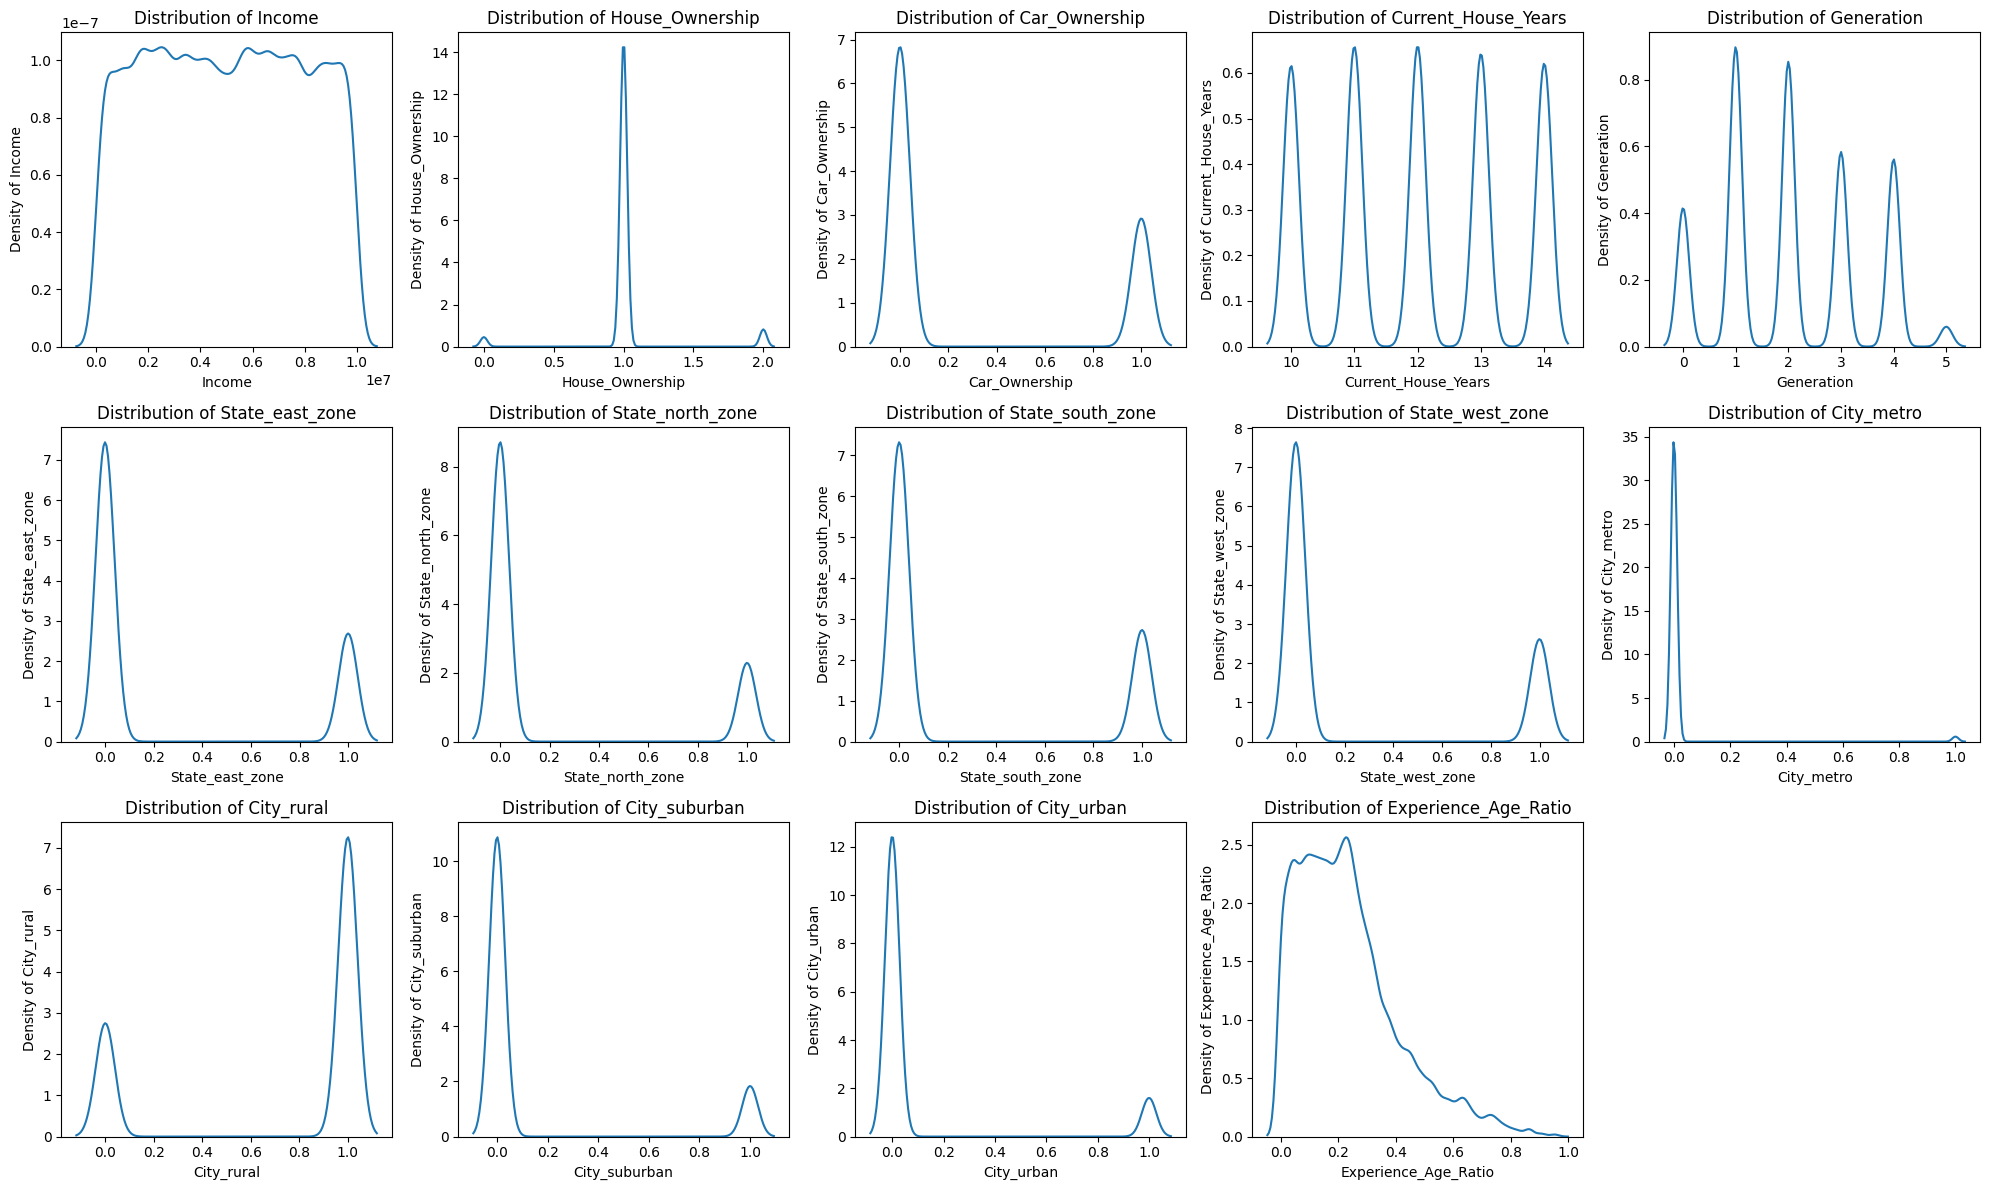

In [ ]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(data = x_train, ax=axes[i], x=x_train.columns[i])
  axes[i].set_title(f'Distribution of {x_train.columns[i]}')
  axes[i].set_ylabel(f'Density of {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()
plt.show()

In [46]:
#Normalization (MinMaxScaller)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

columns_to_scale = ['Income', 'Current_House_Years'] #Choose columns for scaling based on the distribution above

x_train[columns_to_scale] = ms.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = ms.fit_transform(x_test[columns_to_scale])

# Save the scaler using joblib and pickle
joblib.dump(ms, 'minmax_scaler.joblib')

with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(ms, file)

In [ ]:
# #Standardization
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()

# columns_to_scale = ['Income', 'Current_House_Years'] #Choose columns for scaling based on the distribution above

# x_train[columns_to_scale] = ss.fit_transform(x_train[columns_to_scale])
# x_test[columns_to_scale] = ss.transform(x_test[columns_to_scale])

# Save the scaler using joblib and pickle
# joblib.dump(ss, 'standard_scaler.joblib')
# with open('standard_scaler.pkl', 'wb') as file:
#     pickle.dump(ss, file)

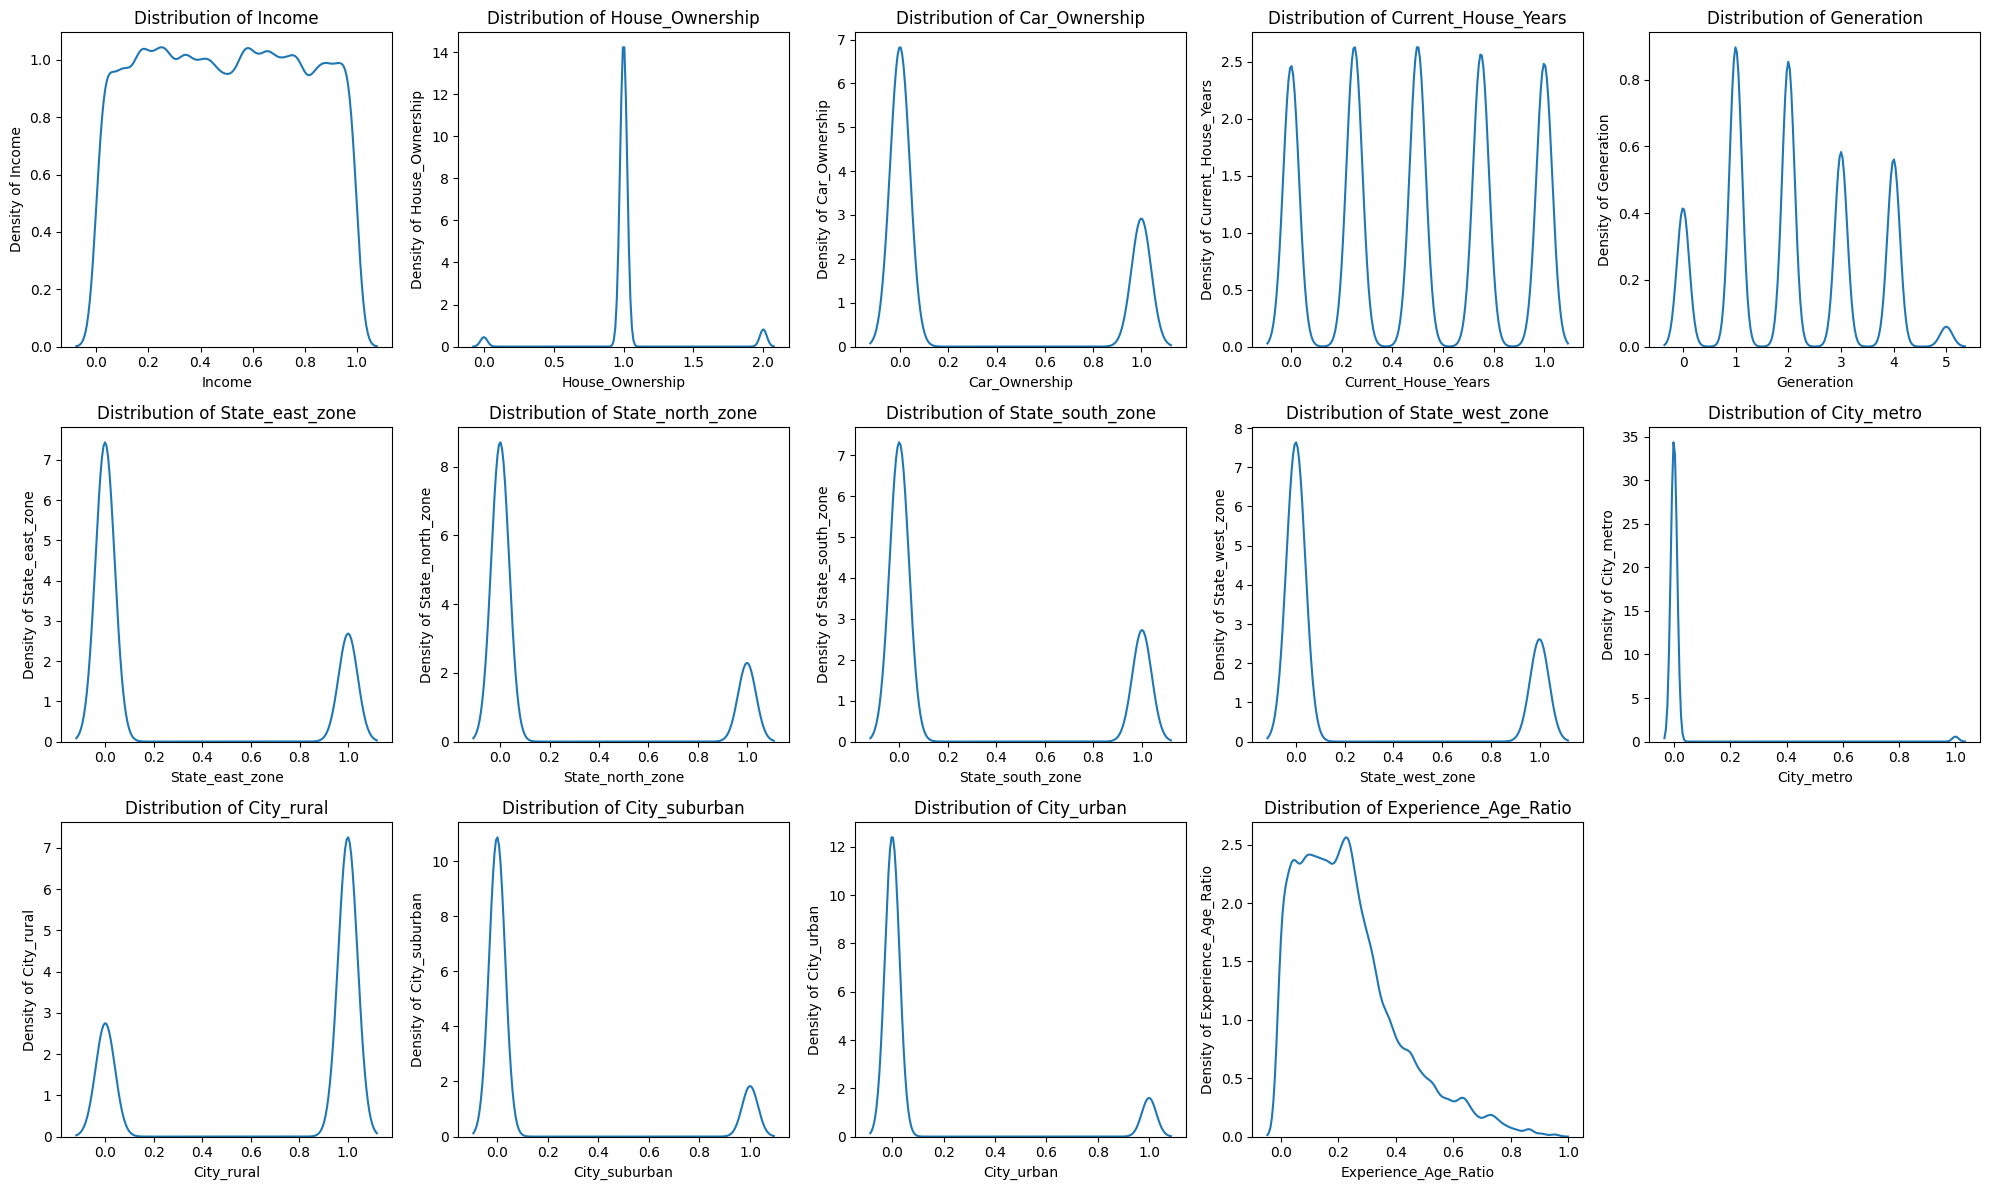

In [ ]:
# Checking distribution after scaling
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
  sns.kdeplot(data = x_train, ax=axes[i], x=x_train.columns[i])
  axes[i].set_title(f'Distribution of {x_train.columns[i]}')
  axes[i].set_ylabel(f'Density of {x_train.columns[i]}')
  axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()
plt.show()

# Handling Class Imbalance

In [47]:
#Initiate dataframe before sampling
x_imbalance = x_train.copy()
y_imbalance = y_train.copy()

In [48]:
#Target values before sampling
value_counts = y_imbalance.iloc[:, 0].value_counts()
print(value_counts)

Risk_Flag
0    154703
1     21697
Name: count, dtype: int64


In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print("Before sampling:")
print("x_imbalance shape:", x_imbalance.shape)
print("y_imbalance shape:", y_imbalance.shape)

# # RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=1)
# x_train_under, y_train_under = rus.fit_resample(x_imbalance, y_imbalance)

# print("After RandomUnderSampler:")
# print("x_train_under shape:", x_train_under.shape)
# print("y_train_under shape:", y_train_under.shape)

# # RandomOverSampler
# ros = RandomOverSampler(sampling_strategy=1)
# x_train_over, y_train_over = ros.fit_resample(x_imbalance, y_imbalance)

# print("After RandomOverSampler:")
# print("x_train_over shape:", x_train_over.shape)
# print("y_train_over shape:", y_train_over.shape)

# SMOTE
smote = SMOTE(sampling_strategy=0.5)
x_train_smote, y_train_smote = smote.fit_resample(x_imbalance, y_imbalance)

print("After SMOTE:")
print("x_train_SMOTE shape:", x_train_smote.shape)
print("y_train_SMOTE shape:", y_train_smote.shape)

Before sampling:
x_imbalance shape: (176400, 14)
y_imbalance shape: (176400, 1)
After SMOTE:
x_train_SMOTE shape: (232054, 14)
y_train_SMOTE shape: (232054, 1)


In [50]:
#Target values after sampling
value_counts = y_train_smote.iloc[:, 0].value_counts()
print(value_counts)

Risk_Flag
0    154703
1     77351
Name: count, dtype: int64


In [51]:
#Initialize sampled train set for modeling process
x_train_sampled = x_train_smote.copy()
y_train_sampled = y_train_smote.copy()

Reminder of class imbalance main concept:

- Undersampling: Majority follows the minority
- Oversampling: Minority follows the majority

# **STAGE 3 : MODELLING AND EVALUATION**

## Train Classification Models

Initial train using default hyperparameters.

In [ ]:
# logictic regression
from sklearn.linear_model import LogisticRegression # import logistic regression from sklearn
lg = LogisticRegression() # initiation object called lg
lg.fit(x_train_sampled, y_train_sampled) # fit logistic regression model in train data

LogisticRegression()

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn from sklearn
knn = KNeighborsClassifier() # initiation object called knn
knn.fit(x_train_sampled, y_train_sampled) # fit knn model in train data

KNeighborsClassifier()

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier # import decision tree from sklearn
dt = DecisionTreeClassifier() # initiation object called dt
dt.fit(x_train_sampled, y_train_sampled) # fit decision tree model in train data

DecisionTreeClassifier()

In [52]:
# random forest
from sklearn.ensemble import RandomForestClassifier # import random forest from sklearn
rf = RandomForestClassifier(random_state=42) # initiation object called rf
rf.fit(x_train_sampled, y_train_sampled) # fit random forest model in train data

RandomForestClassifier(random_state=42)

In [ ]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier # import ADB from sklearn
ab = AdaBoostClassifier() # initiation object called ab
ab.fit(x_train_sampled, y_train_sampled) # fit ADB model in train data

AdaBoostClassifier()

In [ ]:
# xgboost
from xgboost import XGBClassifier # import XGB from sklearn
xg = XGBClassifier() # initiation object called xg
xg.fit(x_train_sampled, y_train_sampled) # fit XGB model in train data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluate Classification Models

In [53]:
#Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_sampled)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_sampled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (Train-Proba): %.2f" % roc_auc_score(y_train_sampled, y_pred_proba_train[:, 1]))
    print("roc_auc (Test-Proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    #Cross Validation
    score = cross_validate(model, x_train_sampled, y_train_sampled, cv=5, scoring='recall', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print('Recall (crossval train): '+ str(score['train_score'].mean()))
    print('Recall (crossval test): '+ str(score['test_score'].mean()))

    # Print standard deviation of recall scores
    print('Recall Std Dev (crossval train): ' + str(score['train_score'].std()))
    print('Recall Std Dev (crossval test): ' + str(score['test_score'].std()))

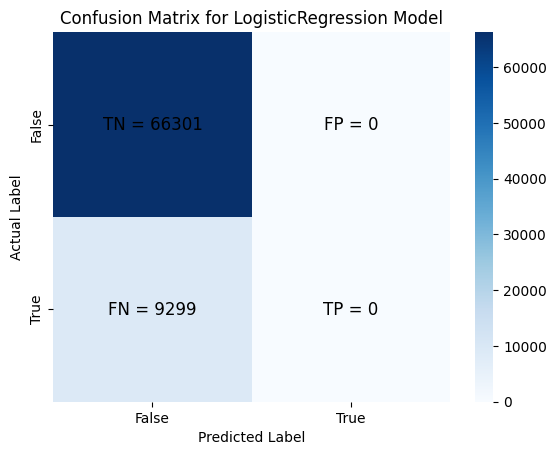

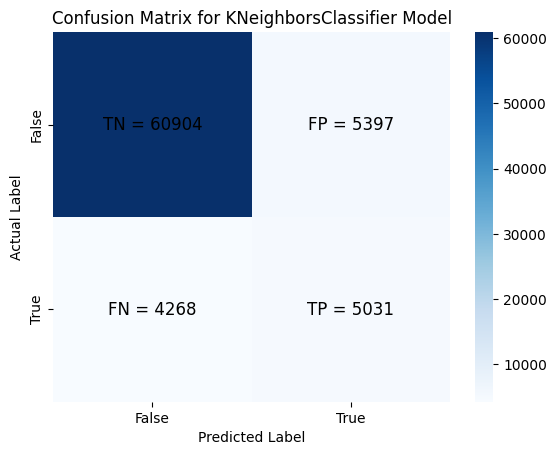

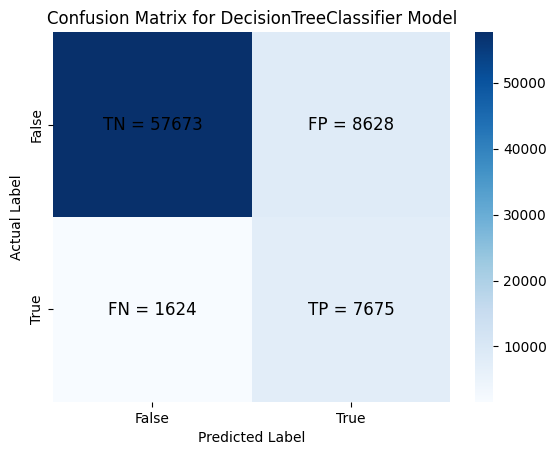

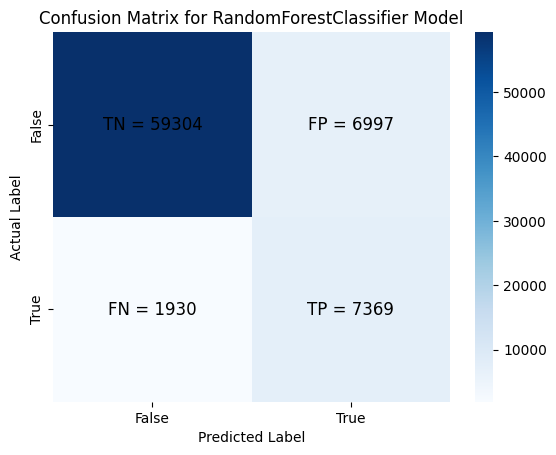

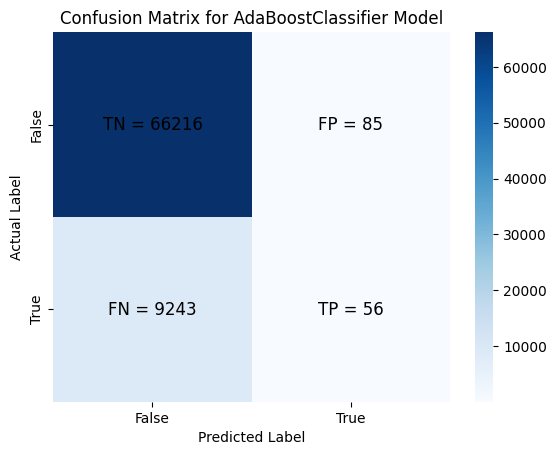

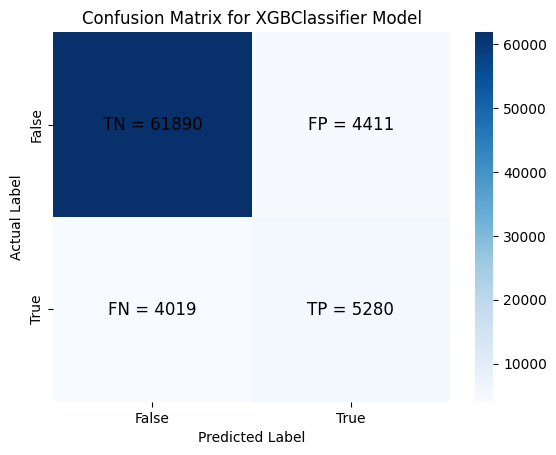

In [ ]:
#Confusion matrix of all models
from sklearn.metrics import confusion_matrix

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

for model in models :

    model.fit(x_train_sampled, y_train_sampled)

    y_pred = model.predict(x_test)

    #Make confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)

    #Plot the confusion matrix in heatmap
    sns.heatmap(conf_mat, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    plt.title(f'Confusion Matrix for {type(model).__name__} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

**Additional Information About confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

In [ ]:
#Printing metrics in form of classification report
from sklearn.metrics import classification_report

def display_classification_reports(model_for_report):
    model_for_report.fit(x_train_sampled, y_train_sampled)
    y_pred = model_for_report.predict(x_test)
    print("Classification Report for", type(model_for_report).__name__)
    print(classification_report(y_test, y_pred))

# Instantiate models
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# Evaluate and print classification reports for all models
for model in models:
    display_classification_reports(model)

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     66301
           1       0.48      0.54      0.51      9299

    accuracy                           0.87     75600
   macro avg       0.71      0.73      0.72     75600
weighted avg       0.88      0.87      0.88     75600

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     66301
           1       0.47      0.83      0.60      9299

    accuracy                           0.

**Additional Information About Classification_Report**

1. `from sklearn.metrics import classification_report`: This line imports the `classification_report` function from scikit-learn's `metrics` module. This function is used to generate a text report that includes precision, recall, f1-score, and support for each class.

2. `print(classification_report(y_test, y_pred))`: This line prints the classification report based on the true labels (`y_test`) and the predicted labels (`y_pred`). `y_test` typically represents the actual class labels in your test set, and `y_pred` represents the predicted labels generated by your machine learning model.

Now, regarding the interpretation of the classification report:
- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0 and class 1, precision will be separately calculated.
- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. It is also calculated separately for class 0 and class 1.
- F1-score: The F1-score is the weighted average of precision and recall. It is a good way to show a balance between precision and recall.
- Support: Support is the number of actual occurrences of the class in the specified dataset.

The classification report will include these metrics for each class in your classification problem. The classes are typically denoted as 0 and 1 in binary classification problems. Class 0 usually represents the negative class (e.g., non-event or absence of a condition), and Class 1 represents the positive class (e.g., event or presence of a condition).

In the report, you will see values for precision, recall, f1-score, and support for both Class 0 and Class 1. The interpretation of these metrics depends on the context of your specific classification problem. Generally, you would want high values for precision, recall, and f1-score, indicating good performance of your model.

In [ ]:
#Printing metrics score for all models to compare

#Logistic Regression
print('Evaluate LogisticRegression')
eval_classification(lg)

#K-Nearest Neighbors Classifier
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)

#Decision Tree Classifier
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

#Random Forest Classifier
print('\nEvaluate RandomForestClassifier')
eval_classification(rf)

#AdaBoost Classifier
print('\nEvaluate AdaBoostClassifier')
eval_classification(ab)

#XGBoost Classifier
print('\nEvaluate XGBoostClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy (Test Set): 0.88
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (Train-Proba): 0.54
roc_auc (Test-Proba): 0.54
Recall (crossval train): 5.817617685557765e-05
Recall (crossval test): 3.878474466709761e-05
Recall Std Dev (crossval train): 6.0118857929698207e-05
Recall Std Dev (crossval test): 5.171299288946348e-05

Evaluate KNeighborsClassifier
Accuracy (Test Set): 0.87
Precision (Test Set): 0.48
Recall (Test Set): 0.54
F1-Score (Test Set): 0.51
roc_auc (Train-Proba): 0.94
roc_auc (Test-Proba): 0.87
Recall (crossval train): 0.6023906478881255
Recall (crossval test): 0.5741737831153702
Recall Std Dev (crossval train): 0.19422839905854036
Recall Std Dev (crossval test): 0.20057374266516237

Evaluate DecisionTreeClassifier
Accuracy (Test Set): 0.86
Precision (Test Set): 0.47
Recall (Test Set): 0.83
F1-Score (Test Set): 0.60
roc_auc (Train-Proba): 0.98
roc_auc (Test-Proba): 0.85
Recall (crossval train): 0.995730499403

Please note that in this dataset, 0 means non-default (non-default payment) and 1 means default.

- False Positive: Actual is non-default but predicted as default.
- False Negative: Actual is default but predicted as non-default.

**In this case, we want to minimize False Negatives as much as possible, so the primary metric to be evaluated is recall (although every metric will still be displayed).**

# Summary of Models Generated by Various ML Algorithms

Experimentation has been conducted on the following models (default hyperparameters):

1. Logistic Regression
2. K-Nearest Neighbor Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient Boosting (AdaBoost and XGBoost)

From all of these, the best results were obtained by:

- **Decision Tree Classifier**
- **Random Forest Classifier**
- **XGBoost Classifier**

Thus, the three models generated from tree-based algorithms can be subjected to hyperparameter tuning to slightly improve their performance (for other models with sufficiently good performance, if time and other resources permit, experiments will be conducted).

**However, for now, in accordance with the guidance and instructions from the mentor, only the best model is chosen to examine feature importance scores and undergo hyperparameter tuning with GridSearch, and the best result (recall) is achieved by Random Forest.**

One thing to consider is that the actual condition factor (test data) which is imbalanced also needs to be taken into account, so examining the ROC-AUC performance metric might be important. This is done because looking at the recall performance of random forest and decision tree might be close, but on metrics capturing imbalanced conditions such as ROC-AUC, they can be quite different.

## Feature Importances from Classification Models

In [ ]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

In [ ]:
# Feature importance in random forest
show_feature_importance(rf)

In the model generated using the random forest algorithm, the top 4 features contributing the most to the prediction results are Income, Experience_Age_Ratio, Current_House_Years, and Generation.

## Hyperparameter Tuning

In [54]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest

Param value: 1; train: 0.9572468358521544; test: 0.8260027959995698; difference: 0.1312440398525846
Param value: 6; train: 0.9807242311023775; test: 0.7903000322615334; difference: 0.19042419884084405
Param value: 12; train: 0.9919070212408372; test: 0.7941714162813206; difference: 0.1977356049595166
Param value: 18; train: 0.9933291101601789; test: 0.7913754167114744; difference: 0.2019536934487045
Param value: 24; train: 0.9949451202957945; test: 0.7933111087213679; difference: 0.20163401157442662
Param value: 30; train: 0.9960310791069281; test: 0.7942789547263147; difference: 0.2017521243806134
Param value: 36; train: 0.9957595894041448; test: 0.7938488009463384; difference: 0.2019107884578064
Param value: 41; train: 0.9959664387015036; test: 0.7940638778363265; difference: 0.2019025608651771
Param value: 47; train: 0.9961991441610322; test: 0.7948166469512851; difference: 0.2013824972097471
Param value: 53; train: 0.9960440071880131; test: 0.793526185611356; difference: 0.20251782

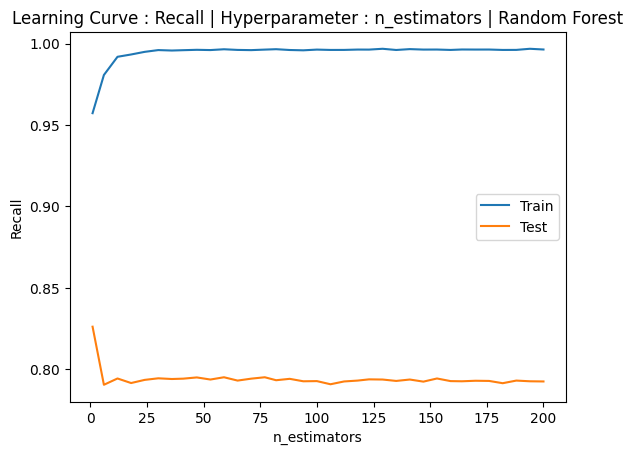

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9469337177023718; test: 0.8496476650068167; difference: 0.09728605269555513
Param value: 6; train: 0.9725438754190336; test: 0.9147175064671599; difference: 0.05782636895187376
Param value: 12; train: 0.9731104157327992; test: 0.9267686294598483; difference: 0.046341786272950936
Param value: 18; train: 0.9731824157255945; test: 0.9304165493662409; difference: 0.042765866359353644
Param value: 24; train: 0.9733801741341864; test: 0.9334515150583204; difference: 0.03992865907586607
Param value: 30; train: 0.9734121126023857; test: 0.933639417409351; difference: 0.039772695193034724
Param value: 36; train: 0.9734785111342457; test: 0.934477817788306; difference: 0.039000693345939696
Param value: 41; train: 0.9734840637084273; test: 0.9348384992122701; difference: 0.03864556449615719
Param value: 47; train: 0.9734496819471394; test: 0.9353023673271379; difference: 0.03814731462000154
Param value: 53; train: 0.9734820951600341; test: 0.9354284141082934; difference: 

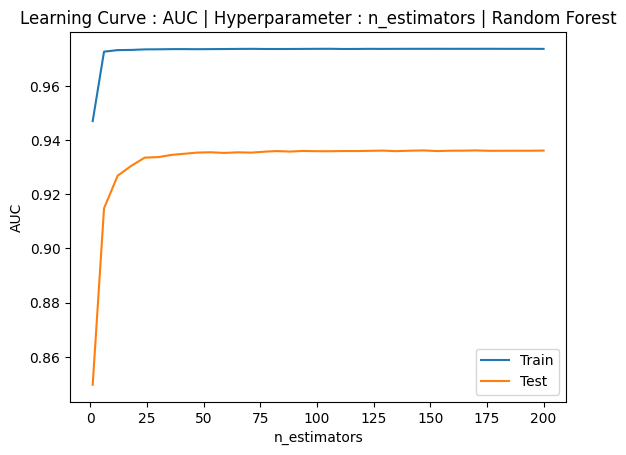

In [ ]:
#Learning curve for hyperparameters (n_estimators)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : n_estimators | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('n_estimators') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.0; test: 0.0; difference: 0.0
Param value: 8; train: 0.033768147793822964; test: 0.029250457038391225; difference: 0.004517690755431739
Param value: 15; train: 0.5013509844733747; test: 0.4303688568663297; difference: 0.07098212760704498
Param value: 22; train: 0.9433491486858605; test: 0.7628777287880417; difference: 0.18047141989781879
Param value: 29; train: 0.9960698633501829; test: 0.7925583396064093; difference: 0.20351152374377357
Param value: 36; train: 0.996574058512495; test: 0.7937412625013442; difference: 0.20283279601115078
Param value: 43; train: 0.996574058512495; test: 0.794709108506291; difference: 0.20186495000620408
Param value: 50; train: 0.9961215756745226; test: 0.7932035702763738; difference: 0.20291800539814886
Param value: 57; train: 0.9963284249718815; test: 0.7936337240563501; difference: 0.20269470091553132
Param value: 64; train: 0.9965869865935799; test: 0.7927734164963974; difference: 0.20381357009718248
Param value: 71; train: 0.

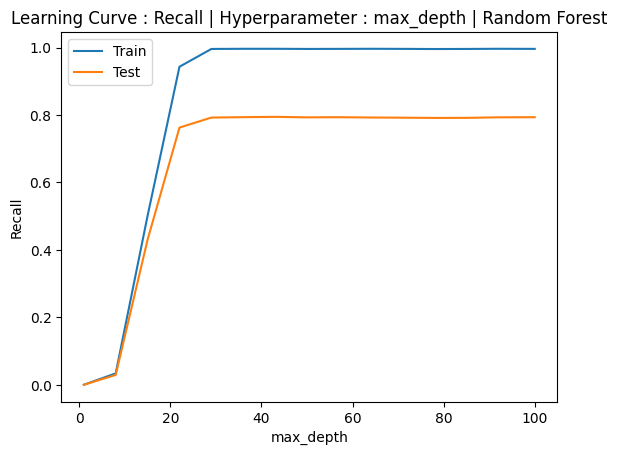

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
#Learning curve for hyperparameters (max_depth)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(max_depth=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : max_depth | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('max_depth') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.5540032666244046; test: 0.5509954480149407; difference: 0.0030078186094638637
Param value: 8; train: 0.7385220233495614; test: 0.7077008152162185; difference: 0.03082120813334288
Param value: 15; train: 0.9397918928656928; test: 0.8830641415513267; difference: 0.056727751314366026
Param value: 22; train: 0.9655356712416292; test: 0.9254921649376305; difference: 0.040043506303998666
Param value: 29; train: 0.9722800243341678; test: 0.9356378067932095; difference: 0.03664221754095831
Param value: 36; train: 0.9735286511853807; test: 0.9355964489096228; difference: 0.03793220227575789
Param value: 43; train: 0.9735702163745921; test: 0.935906336620921; difference: 0.037663879753671026
Param value: 50; train: 0.9735600007144419; test: 0.9358313600988615; difference: 0.037728640615580455
Param value: 57; train: 0.9735826103783403; test: 0.9358062243802135; difference: 0.037776385998126716
Param value: 64; train: 0.9735593596712171; test: 0.9358508683814993; differen

Param value: 2; train: 0.9961345037556075; test: 0.7925583396064093; difference: 0.2035761641491982
Param value: 5; train: 0.9930188362141408; test: 0.7910528013764921; difference: 0.20196603483764863
Param value: 10; train: 0.9891145557264935; test: 0.7898698784815572; difference: 0.19924467724493633
Param value: 50; train: 0.863065765148479; test: 0.7605118829981719; difference: 0.10255388215030714


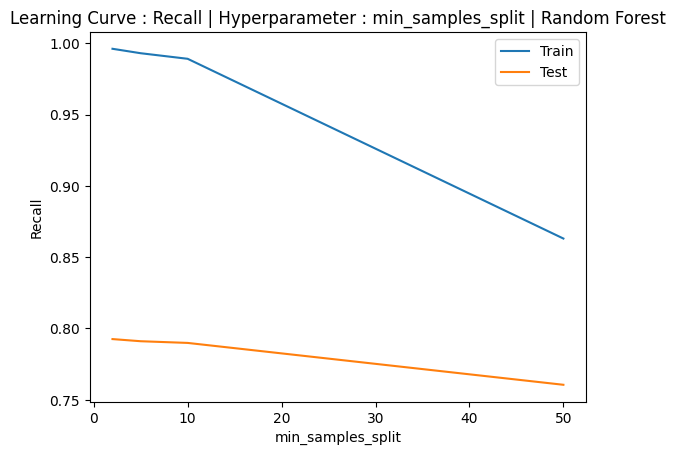

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
#Learning curve for hyperparameters (min_samples_split)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
param_values = [2, 5, 10, 50] # min_samples_split
# param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_split=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_split | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_split') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 2; train: 0.9735522132635188; test: 0.9358985276309595; difference: 0.03765368563255933
Param value: 5; train: 0.9693178097215192; test: 0.9364375279773143; difference: 0.032880281744204876
Param value: 10; train: 0.9668588278288909; test: 0.9367845604968177; difference: 0.03007426733207319
Param value: 50; train: 0.9584564536228296; test: 0.9341810039919697; difference: 0.024275449630859924


Param value: 1; train: 0.9963672092151362; test: 0.7937412625013442; difference: 0.20262594671379197
Param value: 2; train: 0.9684166979095293; test: 0.7827723411119475; difference: 0.18564435679758184
Param value: 5; train: 0.885857972101201; test: 0.7648134207979352; difference: 0.12104455130326575
Param value: 10; train: 0.8276816072190405; test: 0.7585761909882783; difference: 0.06910541623076216
Param value: 30; train: 0.7567840105493142; test: 0.704054199376277; difference: 0.05272981117303721


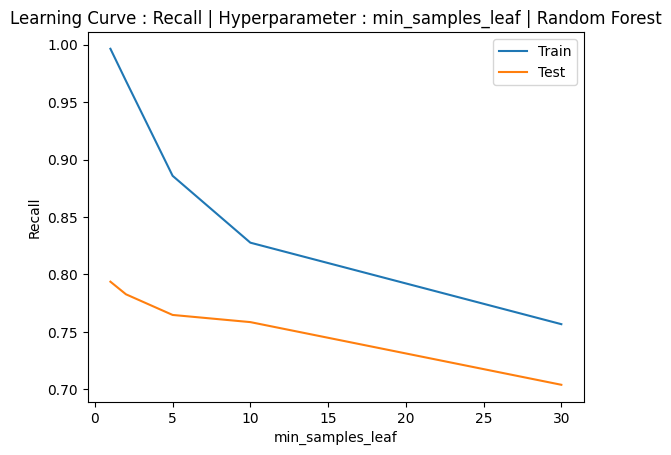

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train = model.predict(x_train_sampled)
    train_recall = recall_score(y_train_sampled, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred_test = model.predict(x_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    # difference eval on train and test
    diff_score = train_recall - test_recall
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : Recall | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('Recall')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
#Learning curve for hyperparameters (min_samples_leaf)

# Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# param_values = [int(x) for x in np.linspace(1, 200, num = 35)] # n_estimators
# param_values = [int(x) for x in np.linspace(1, 100, num = 15)] # max_depth
# param_values = [2, 5, 10, 50] # min_samples_split
param_values = [1, 2, 5, 10, 30] # min_samples_leaf

train_scores = []
test_scores = []
difference_scores = []

for i in param_values:
    model = RandomForestClassifier(min_samples_leaf=i) # Change based on what hyperparameter that we used
    model.fit(x_train_sampled, y_train_sampled)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_sampled)
    train_auc = roc_auc_score(y_train_sampled, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    # difference eval on train and test
    diff_score = train_auc - test_auc
    difference_scores.append(diff_score)

    print('Param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc) + '; difference: '+ str(diff_score))

plt.title('Learning Curve : AUC | Hyperparameter : min_samples_leaf | Random Forest') # Change based on what hyperparameter that we used
plt.ylabel('AUC')
plt.xlabel('min_samples_leaf') # Change based on what hyperparameter that we used
plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Param value: 1; train: 0.9735648159343162; test: 0.9359015818064914; difference: 0.037663234127824796
Param value: 2; train: 0.9653457652573804; test: 0.9361791533237948; difference: 0.029166611933585607
Param value: 5; train: 0.9578020878384732; test: 0.9329731010878138; difference: 0.024828986750659365
Param value: 10; train: 0.9536218831598764; test: 0.9271219674001585; difference: 0.026499915759717885
Param value: 30; train: 0.9411557665614507; test: 0.906233469913587; difference: 0.034922296647863726


Final Hyperparameter used are chosen based on learning curve, iteration of showing best hyperparameters, and some other references

In [ ]:
#Hyperparameter tuning for random forest

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.80
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.94
Recall (crossval train): 0.9965255782605116
Recall (crossval test): 0.9186691951582621
Recall Std Dev (crossval train): 0.0006369598968320071
Recall Std Dev (crossval test): 0.025207756059749526


In [ ]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

In [61]:
#Hyperparameter tuning for random forest (second run for saving model in pickle file)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.79
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.94
Recall (crossval train): 0.9964189210483617
Recall (crossval test): 0.9196775701077108
Recall Std Dev (crossval train): 0.00032507578217464317
Recall Std Dev (crossval test): 0.02625158501822695


In [62]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [63]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

In [55]:
#Hyperparameter tuning for random forest (third run for handling problems in deployment compability, the previous ones are run on google colab this one on local)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(30, 70, num = 15)] # Number of trees in the forest
criterion = ['gini', 'entropy'] # Function to measure the quality of a split
max_depth = [int(x) for x in np.linspace(20, 65, num = 15)] # Maximum depth of the tree
min_samples_split = [2, 5, 10, 12] # Minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 5] # Minimum number of samples required to be at a leaf node

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

#Initiate tuned model
rf = RandomForestClassifier(random_state=42)
# rf_tuned = GridSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='recall')
rf_tuned.fit(x_train_sampled, y_train_sampled)

#Tuned model evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.88
Precision (Test Set): 0.51
Recall (Test Set): 0.79
F1-Score (Test Set): 0.62
roc_auc (Train-Proba): 0.97
roc_auc (Test-Proba): 0.93
Recall (crossval train): 0.9963090344379004
Recall (crossval test): 0.9172083423844024
Recall Std Dev (crossval train): 0.0006822911858585391
Recall Std Dev (crossval test): 0.024106800812066273


In [56]:
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 65, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 47, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [57]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 47,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 65,
 'criterion': 'entropy'}

- Before Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.79
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.94
  - Recall (crossval train): 0.9958856367634411
  - **Recall (crossval test): 0.9170273385528492**
  - Recall Std Dev (crossval train): 0.0007672007703814973
  - Recall Std Dev (crossval test): 0.024670909816901596

- After Hyperparameter Tuning :
  - Accuracy (Test Set): 0.88
  - Precision (Test Set): 0.51
  - Recall (Test Set): 0.79
  - F1-Score (Test Set): 0.62
  - roc_auc (Train-Proba): 0.97
  - roc_auc (Test-Proba): 0.94
  - Recall (crossval train): 0.9964189210483617
  - **Recall (crossval test): 0.9196775701077108**
  - Recall Std Dev (crossval train): 0.00032507578217464317
  - Recall Std Dev (crossval test): 0.02625158501822695

The improvement in Recall can be observed after hyperparameter tuning, even though the increase is small. Other performance improvements can be achieved by using a wider range of hyperparameters (although the computational resources required for this are not currently available) or by further transforming the training data used.

# Business Impact Simulation

By using a random forest model to predict which customers will default, we can reduce the default rate from the initial **12.30%** to:

**Default Rate** = FN / Total Data = 1865/(59163+7138+1865+7434) * 100 = **2.46%**

The assumptions and explanation for the calculation process in the loan context are as follows:

- TN (Predicted non-default and actually non-default)
    - The system approves the loan, and the company gains profit.

- TP (Predicted default and actually default)
    - The system denies the loan, and the company avoids losses.

- FP (Predicted default but actually non-default)
    - The system denies the loan, and the company loses potential profit.

- FN (Predicted non-default but actually default)
    - The system approves the loan, and the company incurs losses.

Thus, only customers classified as FN will be counted as defaulters. TP is not included because they have already been rejected by the system.

# Model Deployment

## Save Model

**Additional Information About Libraries for Saving Model**

Both `pickle` and `joblib` are Python libraries that provide ways to serialize and deserialize objects, including machine learning models. They are used for saving and loading Python objects, and each has its own advantages and use cases.

Here are some key differences between `pickle` and `joblib`:

1. **Performance:**
   - `joblib` is generally more efficient in terms of serialization and deserialization speed, especially for large NumPy arrays and objects with large data structures.
   - `pickle` might be slower than `joblib` for certain use cases.

2. **Dependencies:**
   - `pickle` is a standard library module in Python, so it comes pre-installed with Python. It doesn't have external dependencies beyond the standard library.
   - `joblib` is an external library that you need to install separately using `pip install joblib`. It is not included in the standard library, but it is commonly used in the scientific computing and machine learning community.

3. **Handling NumPy arrays:**
   - `joblib` is particularly optimized for handling NumPy arrays, making it a good choice for saving and loading large numerical datasets efficiently.
   - `pickle` can also handle NumPy arrays, but `joblib` may be more performant for this specific use case.

4. **Compression:**
   - `joblib` supports optional compression, which can be beneficial when dealing with large datasets. You can compress the serialized file to reduce storage space and speed up the I/O operations.
   - `pickle` does not have built-in compression, but you can use external compression libraries in conjunction with `pickle` if needed.

5. **Compatibility:**
   - `pickle` is a standard library module that is widely available and compatible across different Python environments.
   - `joblib` is not a standard library module, so you need to ensure that it is available in your Python environment. While it is commonly used in data science and machine learning environments, it may not be available in every Python environment.

In summary, both `pickle` and `joblib` are suitable for saving and loading machine learning models, but `joblib` is often preferred for its performance benefits, especially when dealing with large numerical datasets. If you are working in a machine learning or scientific computing context, `joblib` might be a good choice. However, for basic serialization needs, `pickle` is a reliable and built-in option.

In [58]:
# Save random forest model
joblib.dump(rf_tuned, 'tuned_random_forest_model.joblib')

# Save using pickle
with open('tuned_random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_tuned, file)

In [ ]:
# # Install steamlit
# pip install streamlit

Problem solving for error installing streamlit

https://youtu.be/zHAM5MGehV8?si=9KkUKX2PBg42sM-M

- The deployment will be done in a separate python file : model_deployment.py

- To run in terminal : streamlit run model_deployment.py

### **Additional Information About Model Deployment Using Streamlit**

**Scaling Process**

When you use MinMaxScaler or any other scaling technique during preprocessing to scale your features to a specific range (e.g., 0 to 1), it's important to use the same scaling on the input features during deployment.

Here's why:

1. **Consistency:** The model has been trained on the scaled features, so it expects input features to be in the same scale. If you provide unscaled features during testing or deployment, the model may not perform as expected.

2. **Normalization:** Many machine learning models, especially distance-based models or models with gradient-based optimization, benefit from normalized features. Normalization ensures that all features contribute equally to the model's learning process.

Therefore, when deploying your model, make sure to apply the same scaling transformation to the input features that you used during the preprocessing stage. This could involve using the MinMaxScaler (or any other scaler) with the same parameters that were used during training.

Here's an example of how you can use the scaler for deployment:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Load the scaler used during training
scaler = joblib.load('your_scaler_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the features
input_feature1 = st.number_input('Feature 1')
input_feature2 = st.number_input('Feature 2')
# Add more input features as needed

# Organize the user inputs into a list or array
user_inputs = [[input_feature1, input_feature2, ...]]

# Scale the user inputs using the same scaler
scaled_inputs = scaler.transform(user_inputs)

# Make predictions
prediction = model.predict(scaled_inputs)

# Display the prediction
st.success(f'The predicted class is {prediction[0]}')
```

In this example, `your_scaler_file.joblib` is the file where you saved the MinMaxScaler during training. Make sure to adjust the file names and paths based on your specific setup.

Using the same scaling parameters ensures that the model receives input features in the same scale it has seen during training, leading to more reliable predictions.

**Features Used**

The number of input elements in your Streamlit app should be based on the total number of features after the encoding process. When you perform feature engineering such as one-hot encoding and count/frequency encoding, you create additional features based on the original ones.

For example, if your original dataset had 5 categorical features and 8 numerical features, and after encoding, you end up with 20 features (10 from one-hot encoding and 10 from count/frequency encoding), then your Streamlit app should have input elements for all 20 features.

In the modified Streamlit code, you'll need to add input elements for each of the engineered features. Here's a general example:

```python
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('your_model_file.joblib')

# Create a Streamlit interface to take user input and make predictions
st.title('Your Machine Learning Model Deployment')

# Add input elements for the encoded features
# Replace these with the actual names of your features
input_feature1 = st.slider('Feature 1', min_value=0.0, max_value=10.0, value=5.0)
input_feature2 = st.slider('Feature 2', min_value=0.0, max_value=10.0, value=5.0)
# Repeat this for all 20 features after encoding

# When the user clicks the 'Predict' button, make predictions using the loaded model
if st.button('Predict'):
    # Organize the user inputs into a list or array
    user_inputs = [input_feature1, input_feature2, ..., input_feature20]

    # Make predictions
    prediction = model.predict([user_inputs])

    # Display the prediction
    st.success(f'The predicted class is {prediction[0]}')
```

Make sure to adjust the input elements and their names based on your specific feature names after the encoding process. If you performed one-hot encoding, you might have binary features, and sliders might not be the best choice. You might need to use other Streamlit input elements, such as checkboxes or text inputs, depending on the nature of your encoded features.